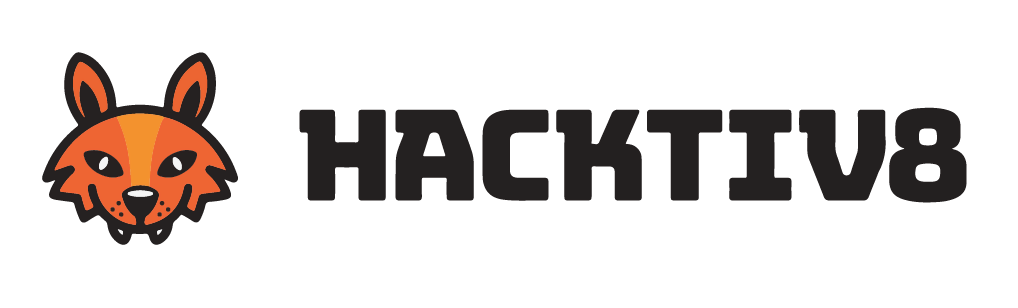

# FINAL PROJECT 4: CLUSTERING

Project ini disusun guna memenuhi tugas studi independen program **Python for Data Science**

## Introduction

### Our Teams:
1. Haikal Efendi - PYTN-KS08-001
2. Ni Made Kirei Kharisma Handayani - PYTN-KS08-002
3. Rosita Nurul Janatin - PYTN-KS08-005

### Data
Data yang digunakan bersumber dari website kaggle. dataset berisi perilaku belanja dan data tidak berlabel yang berkaitan dengan transaksi kartu kredit. Tujuan utama dari penelitian ini untuk menunjukkan segmentasi pelanggan yang paling sesuai dengan dataset ini dengan mengimplementasikan analisa clustering. Algoritma dan metode yang digunakan pada project ini adalah algoritma **K-Means Clustering**, hal ini karena algoritma ini lebih efisien dalam menangani dataset yang besar, algoritma sederhana dan mudah untuk dimengerti dan diterapkan.

Teknik lain yang digunakan dalam analisis ini adalah Principal Component Analysis (PCA) sebagai reduction dimension dataset dengan mengidentifikasi pola untuk mengurangi dimensi dataset. Penggunaan PCA bisa membantu mengoptimalkan hasil cluster dari K-means clustering dengan mendeteksi cluster tambahan dibandingkan dengan jumlah cluster pada K-means tanpa dibandingkan dengan jumlah optimal cluster pada K-means tanpa menggunakan PCA. 

Data ini berisi transaksi pengguna kartu kredit sebanyak 8950 transaksi selama 6 bulan dengan 18 atribut.

1. CUSTID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFFPURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES : Amount of purchase done in installment
7. CASHADVANCE : Cash in advance given by the user
8. PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13. PURCHASESTRX : Numbe of purchase transactions made
14. CREDITLIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user
17. PRCFULLPAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user

## A. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## B. Data Loading

### Import Dataset

In [2]:
# import data set
df = pd.read_csv('CC GENERAL.csv')

In [3]:
# menampilkanm 5 data teratas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# menampilkan 5 data terbawah
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
# mengetahui dimensi data set
df.shape

(8950, 18)

dataset terdiri dari 8950 baris dan 18 kolom. hal ini berarti bahwa ada 18 atribut dengan 8950 observasi

### Informasi data

In [6]:
# menampilkan informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# menampilkan jumlah nilai unique tiap atribut
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [8]:
# melihat nilai unique tiap atribut
for val in df.columns:
    print(val, ': ')
    print(df[val].value_counts())
    print(" ")

CUST_ID : 
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64
 
BALANCE : 
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: BALANCE, Length: 8871, dtype: int64
 
BALANCE_FREQUENCY : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000    

## C. Data Cleaning

### Cek Missing Value

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

pada atribut **CREDIT_LIMIT** terdapat missing value sebanyak 1 dan **MINIMUM_PAYMENTS** sebanyak 313. maka perlu dilakukan penanganan missing value menggunakan mean untuk mengganti nilai missing value.

### Penanganan Missing Value

In [10]:
# mengisi missing value dengan nilai mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

### Mengecek kembali Missing value

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

terlihat sudah tidak ada missing value

### Cek duplikasi data

In [12]:
df.duplicated().sum()

0

tidak ada data yang berduplikasi

## D. Eksplorasi Data

### Deskripsi data

In [13]:
# melihat info statistik data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


diperoleh informasi:
1. **BALANCE** : rata-rata jumlah saldo customer yang tersisa adalah 1564.474828, dengan nilai minimum 0 dan nilai maksimum 19043.138560	
2. **PURCHASES** : Rata-rata jumlah saldo pembelian customer adalah 1003.204834, dengan nilai minimum 0 dan nilai maksimum 49039.570000
3. **CASH ADVANCED** : rata-rata jumlah uang muka yang diberikan customer adalah 978.871112, dengan nilai minimum 0 dan nilai maksimum 47137.211760

### Distribusi tiap atribut

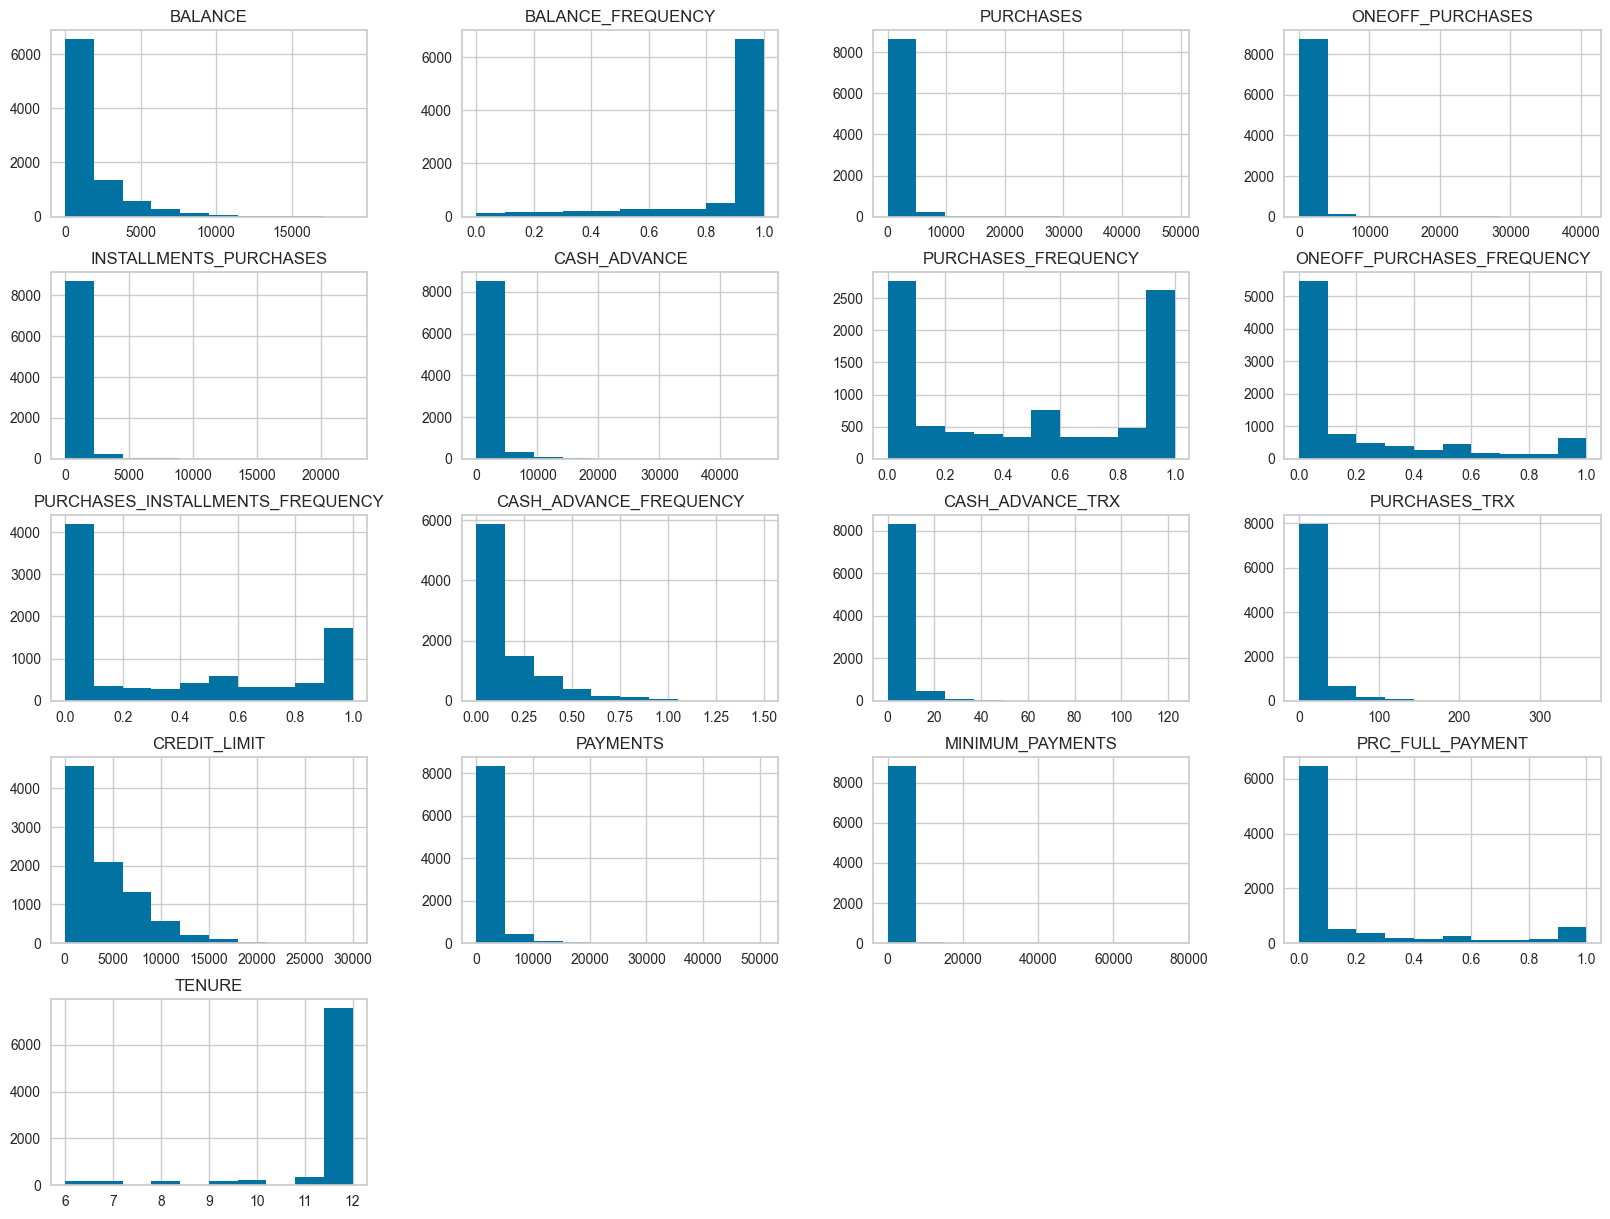

In [14]:
# membuat histogram pada setiap atribut
df.hist(figsize=(20,15));

dari histrogram diatas diketahui bahwa hampir semua atribut memiliki nilai minimum 0.

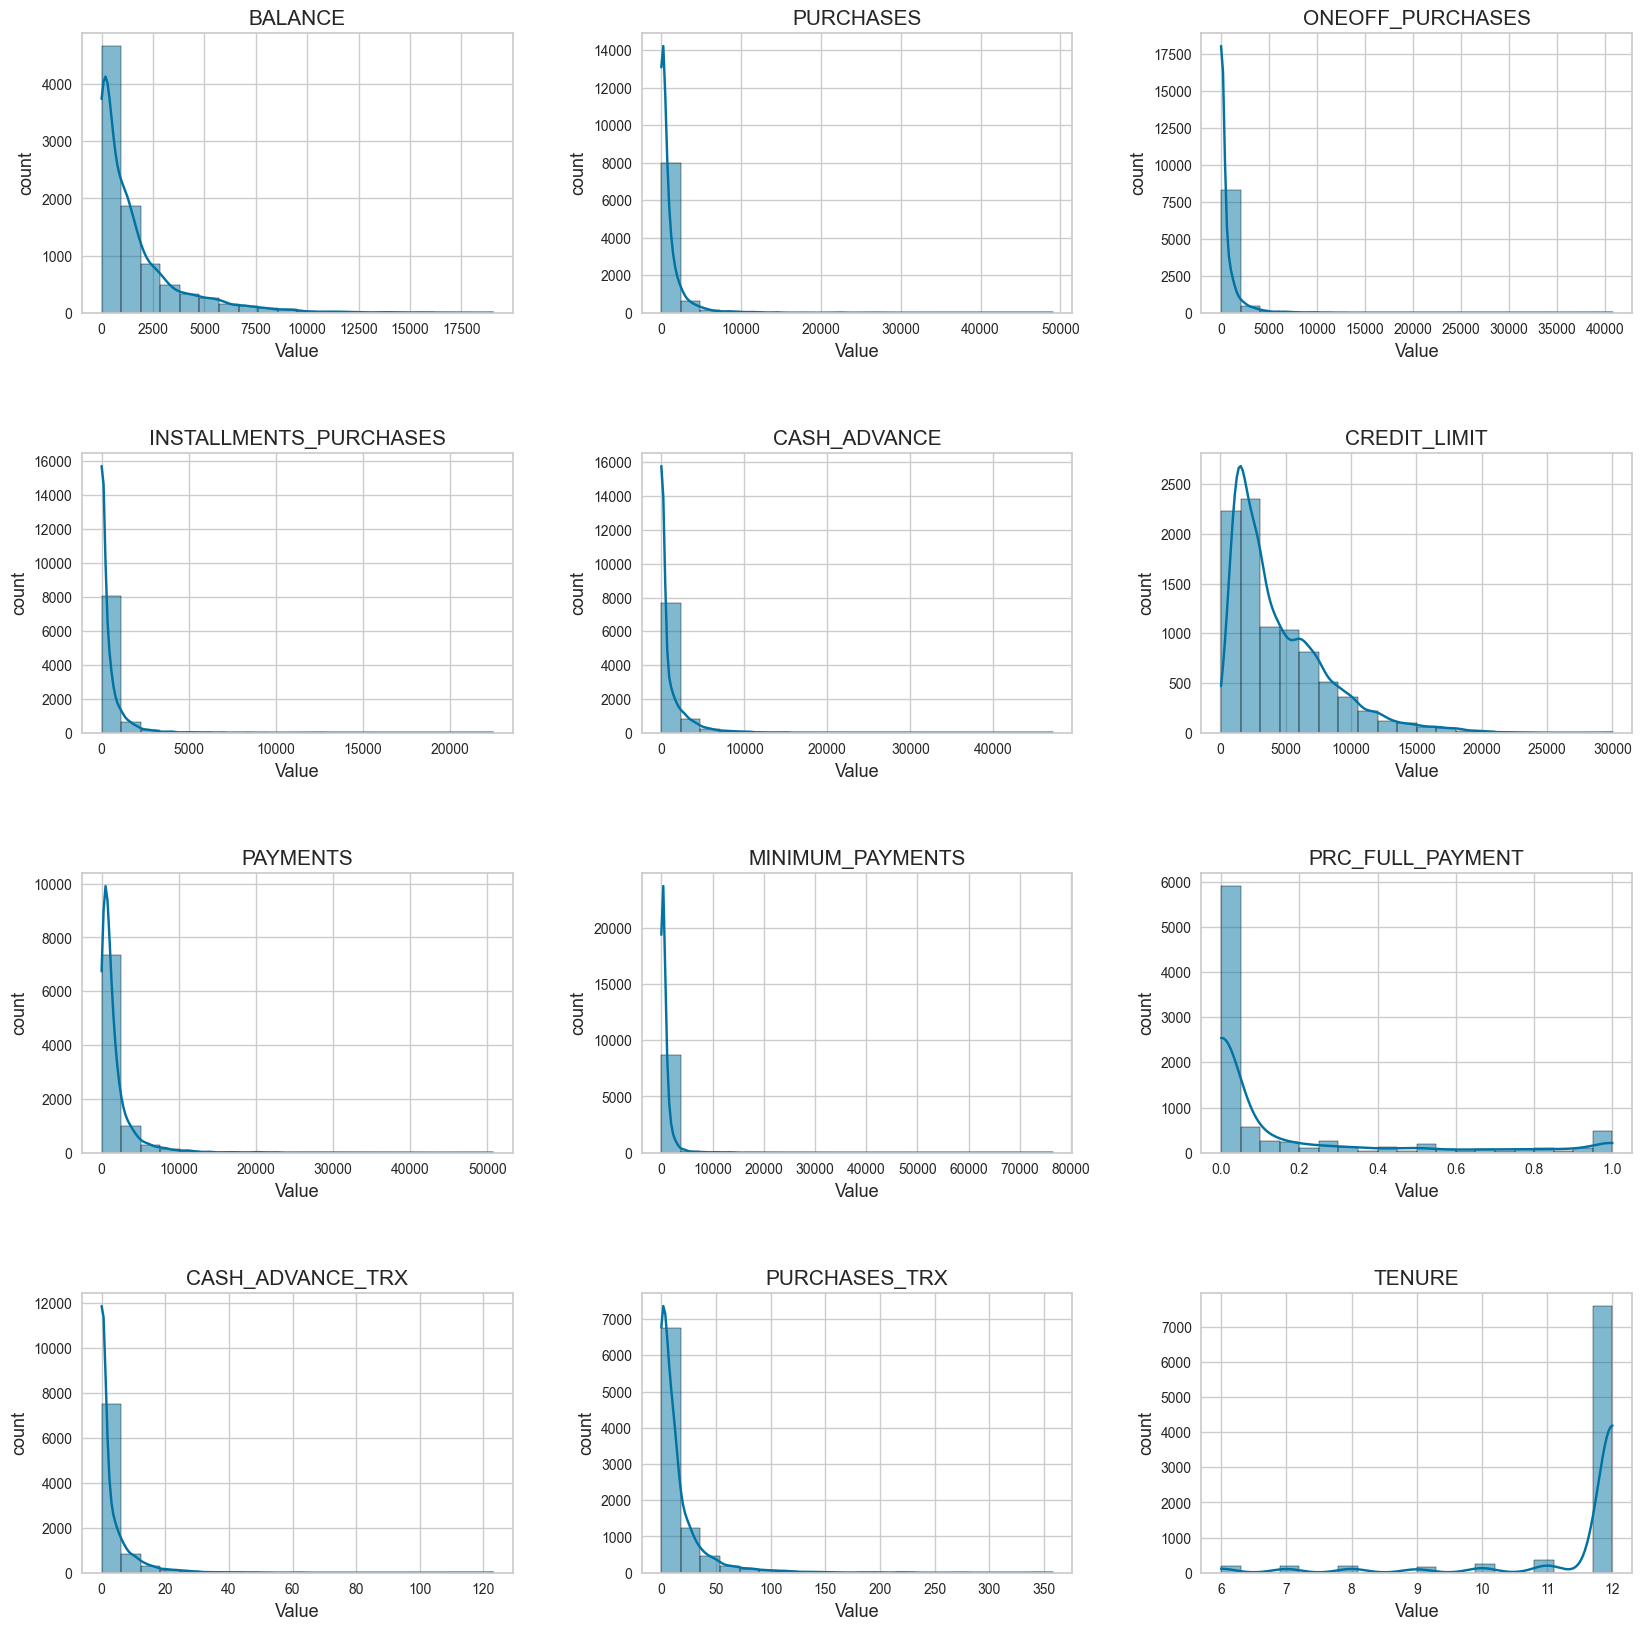

In [15]:
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
intr_cols = ['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'balance_frequency', 'purchases_frequency', 
             'oneoff_purchases_frequency', 'purchases_installments_frequency']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)

semua atribut memiliki distribusi tidak normal karena mengalami skewness

### Korelasi atribut

In [16]:
# mendapatkan nilai korelasi atribut
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


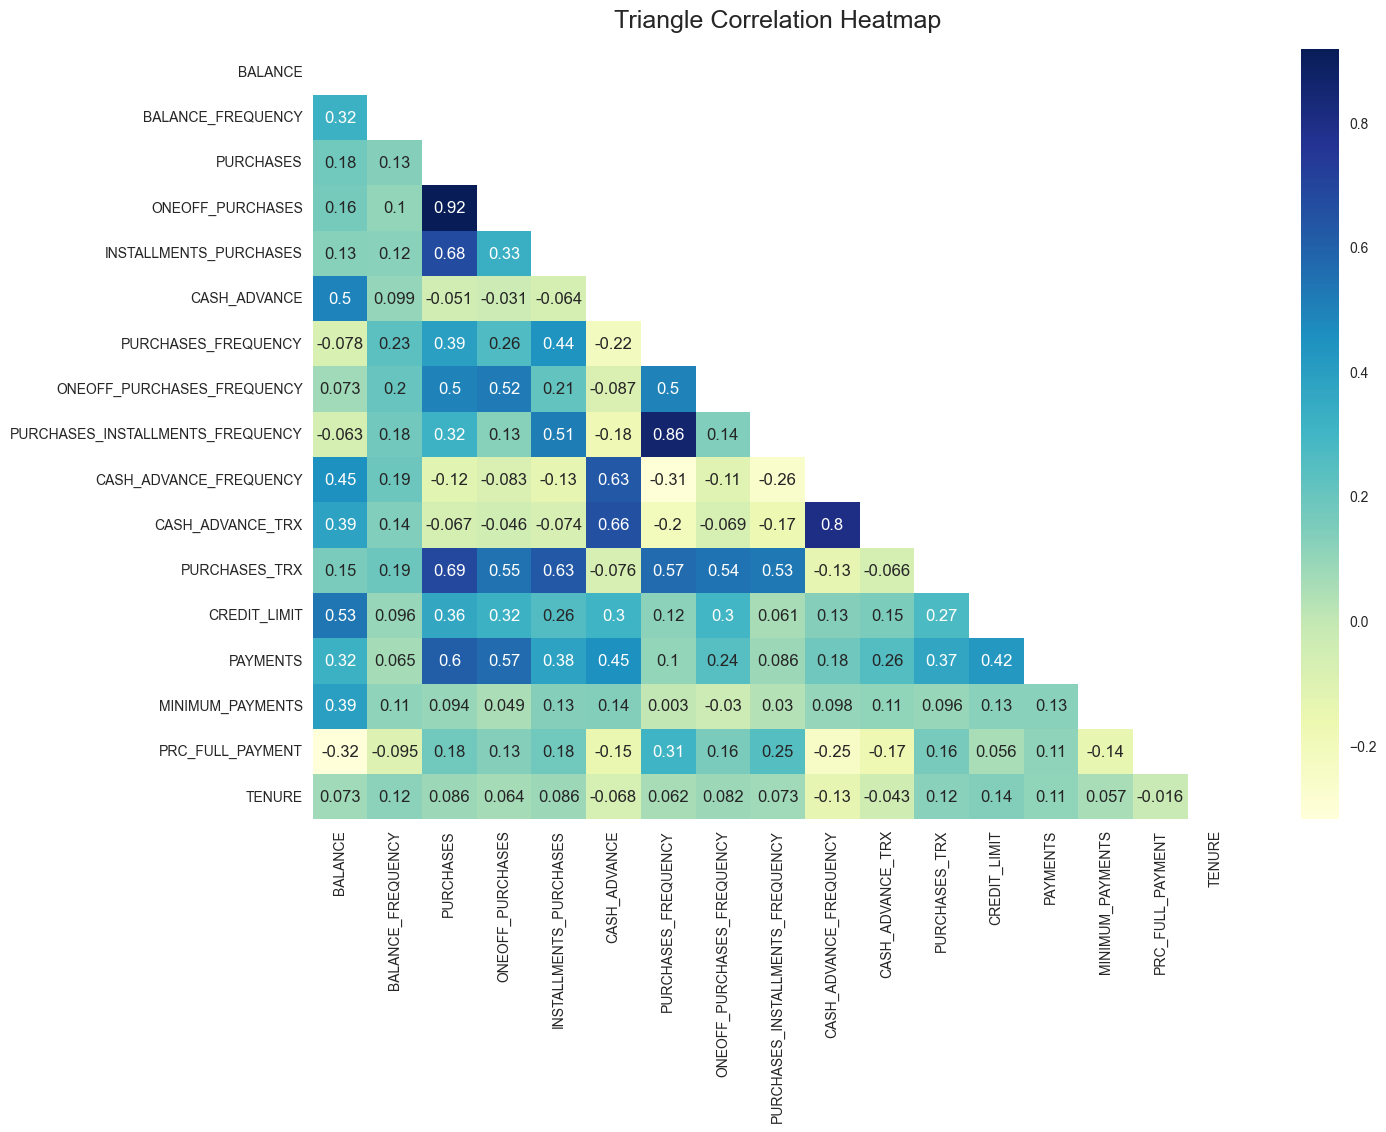

In [17]:
# visualisasi nilai korelasi atribut dengan heatmap
plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask, cmap='YlGnBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

pada algortima segmentasi tidak memerlukan atribut-atribut yang memiliki nilai korelasi tinggi sehingga dalam pengujian ini diperlukan asumsi non-multikolinearitas (tidak terdapat autokorelasi). hal ini karena algoritma tersebut merepresentasikan karakteristik yang sama dari sebuah segmen.

dari matrix korelasi yang dihasilkan, terlihat atribut yang memiliki korelasi tinggi yaitu:
- PURCHASES dan ONEOFF_PURCHASES sebesar 0.92
- PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY sebesar 0.86
- CAHS_ADVANCED_FREQUENCY dan CASH_ADVANCED_TRX sebesar 0.8

untuk mengatasi ini tidak dianjurkan untuk membuang atribut, maka perlu penggunaan PCA untuk membantu mempertahankan informasi dan diperoleh variabel yang independent

## E. Data Preprocessing

### Slicing Data
menghapus atribut **CUST_ID** karena bersifat unik

In [18]:
# menghapus kolom CUST_ID
df.drop(columns=['CUST_ID'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Checking Outlier

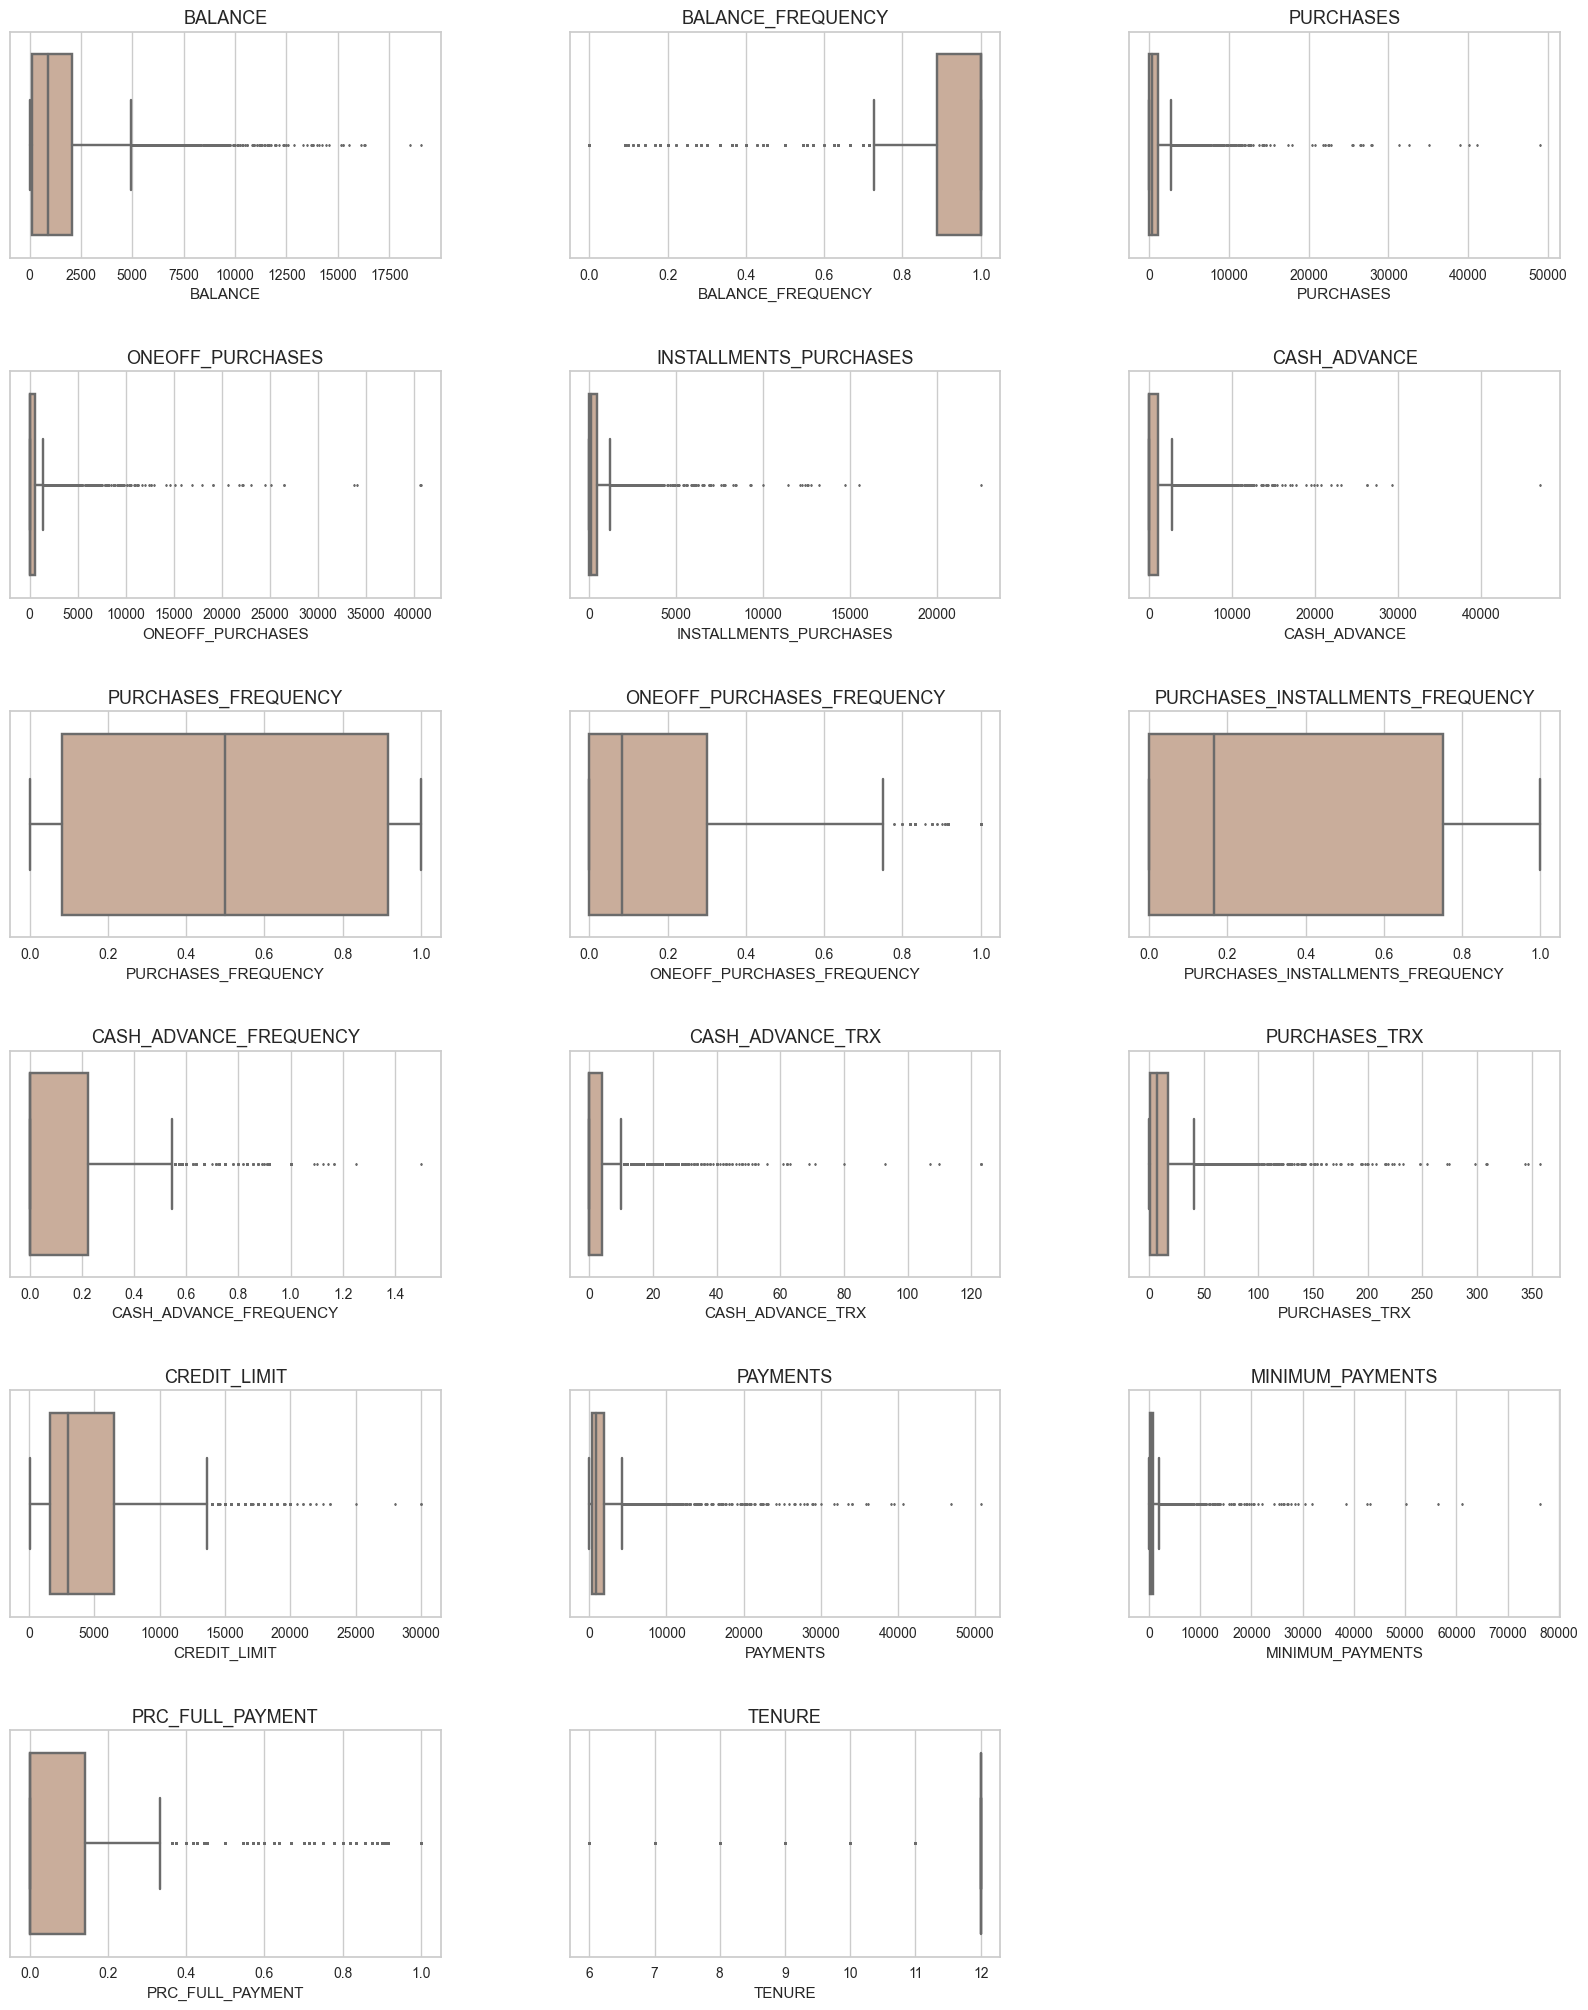

In [19]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize =(20,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='pink', fliersize=1)

grafik box-plot memberikan informasi bahwa masih ada beberapa atribut yang memiliki nilai outlier sehingga perlu dilakukan penanganan dengan menghapus nilai outlier berdasarkan range nilai tertentu

In [20]:
# handling outlier
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
def RemoveOutliers(num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*3)
        upper_threshold = df[col].quantile(0.75)+(iqr*3)
        print(f"Rentang nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(num_cols)

Rentang nilai outlier pada fitur BALANCE : <-5649.29 atau >7831.71
Rentang nilai outlier pada fitur BALANCE_FREQUENCY : <0.56 atau >1.33
Rentang nilai outlier pada fitur PURCHASES : <-3171.85 atau >4321.62
Rentang nilai outlier pada fitur ONEOFF_PURCHASES : <-1732.22 atau >2309.62
Rentang nilai outlier pada fitur INSTALLMENTS_PURCHASES : <-1405.91 atau >1874.55
Rentang nilai outlier pada fitur CASH_ADVANCE : <-3341.46 atau >4455.28
Rentang nilai outlier pada fitur PURCHASES_FREQUENCY : <-2.42 atau >3.42
Rentang nilai outlier pada fitur ONEOFF_PURCHASES_FREQUENCY : <-0.9 atau >1.2
Rentang nilai outlier pada fitur PURCHASES_INSTALLMENTS_FREQUENCY : <-2.25 atau >3.0
Rentang nilai outlier pada fitur CASH_ADVANCE_FREQUENCY : <-0.67 atau >0.89
Rentang nilai outlier pada fitur CASH_ADVANCE_TRX : <-12.0 atau >16.0
Rentang nilai outlier pada fitur PURCHASES_TRX : <-47.0 atau >65.0
Rentang nilai outlier pada fitur CREDIT_LIMIT : <-13100.0 atau >21200.0
Rentang nilai outlier pada fitur PAYMENTS :

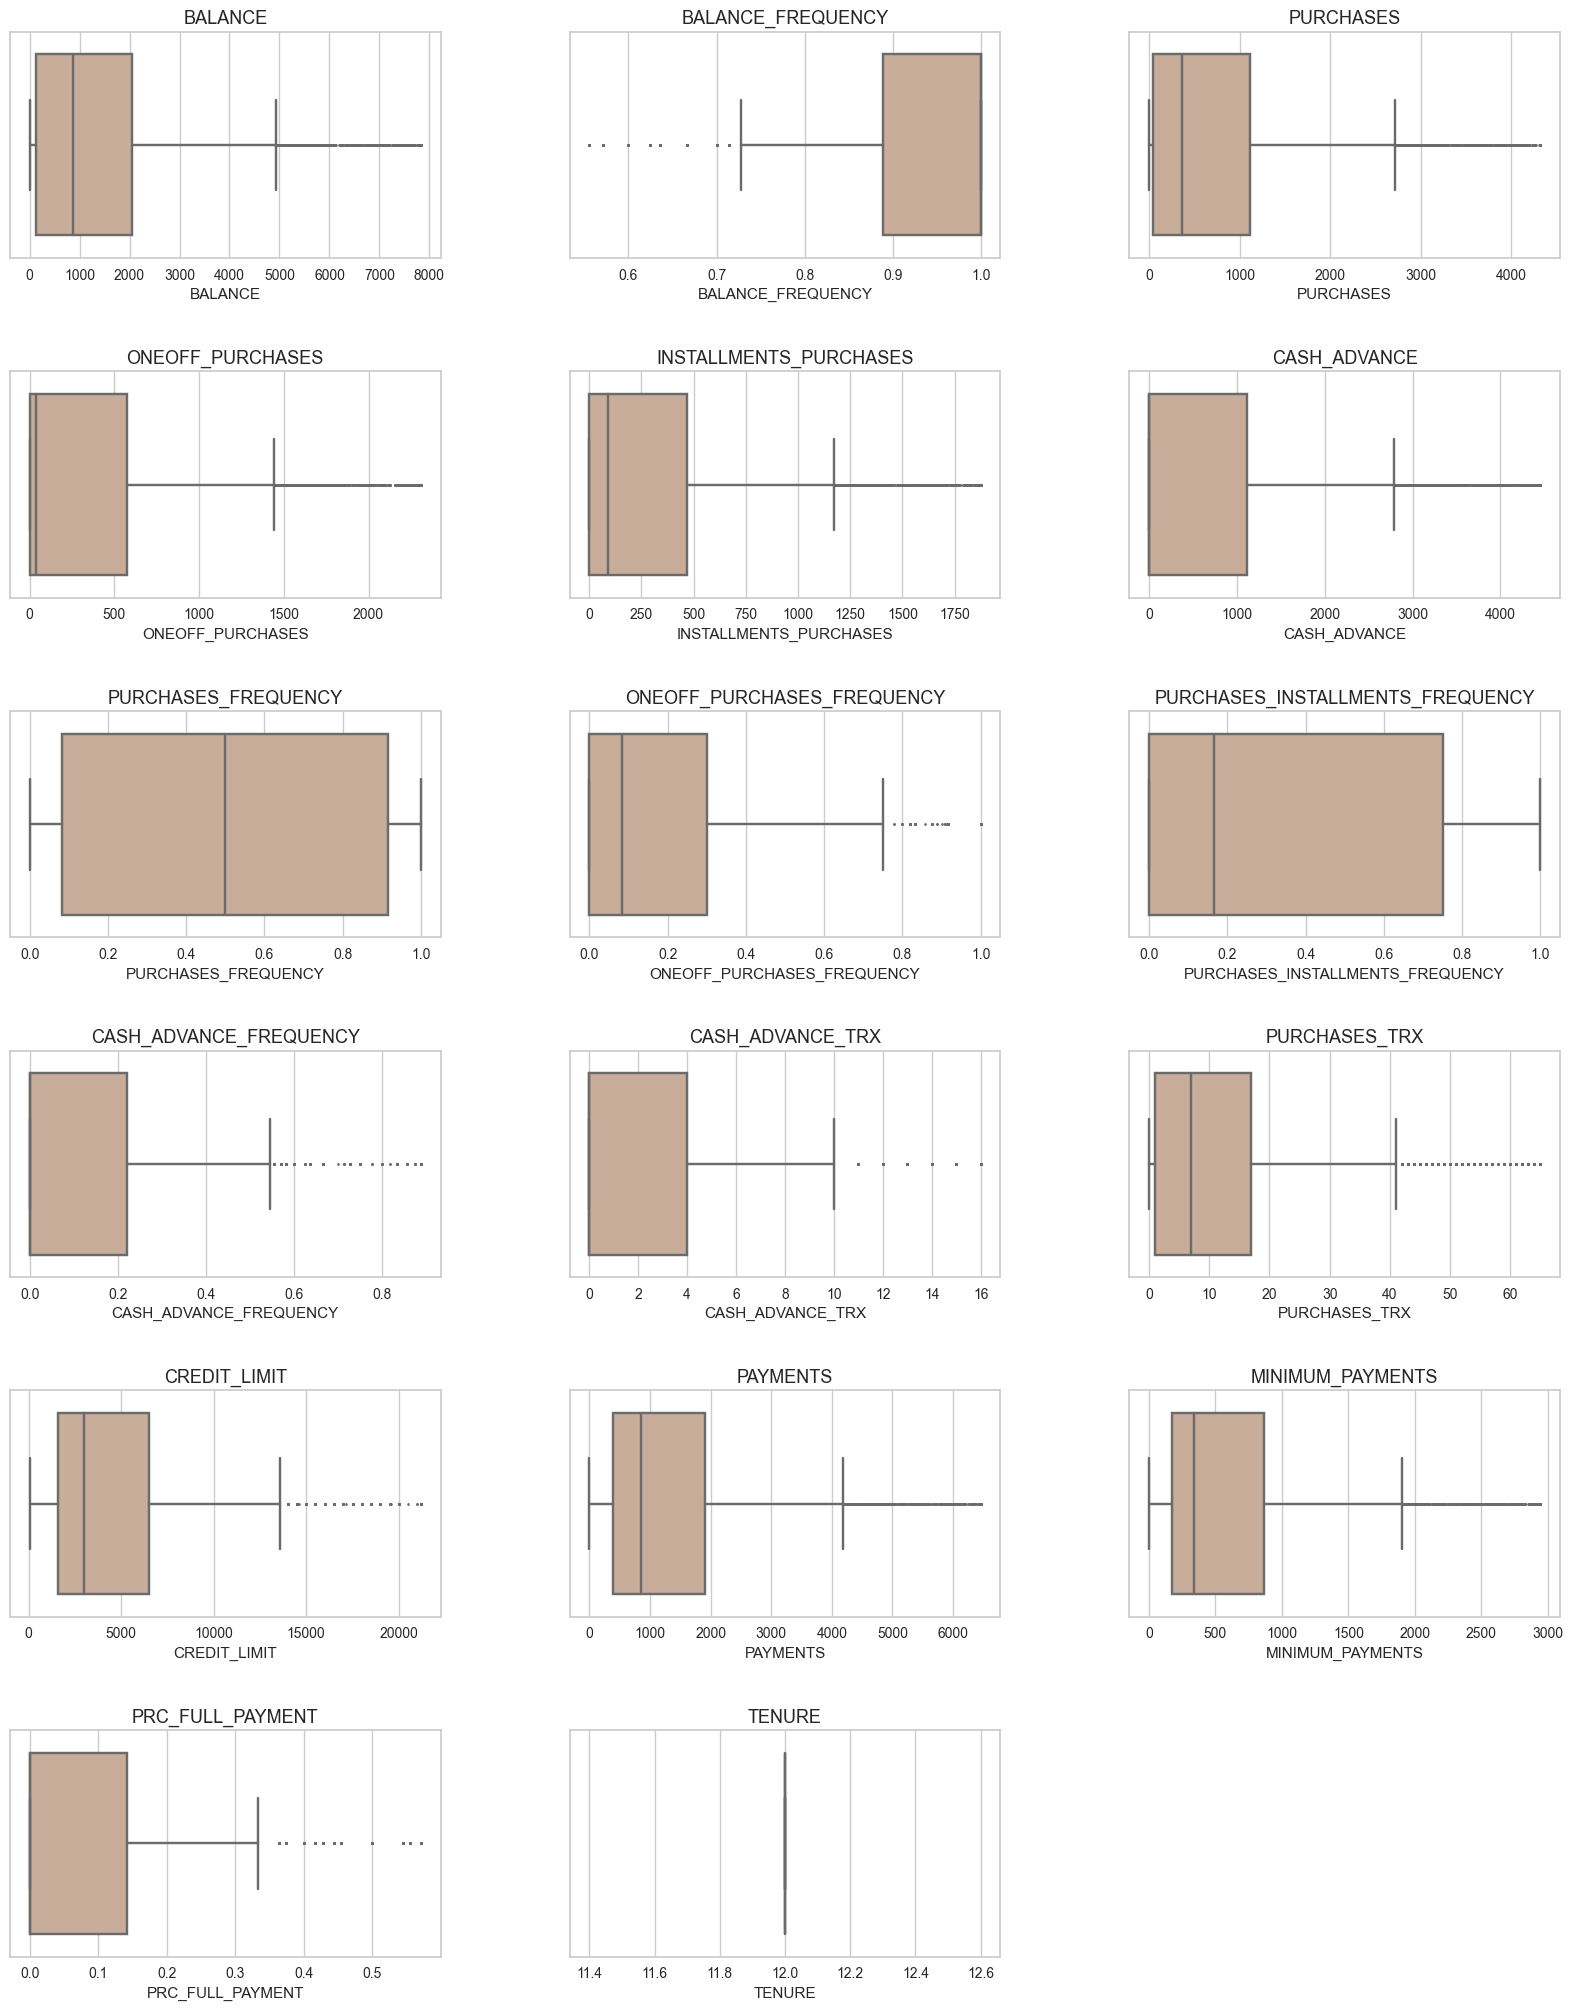

In [21]:
# cek kembali outlier
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize =(20,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='pink', fliersize=1)

terlihat sudah berkurang outlier dari feature-feature diatas

## F. Modelling

### - K-Means Algorithm dengan PCA (tanpa Scaling)

#### PCA

In [22]:
# PCA model menggunakan n_component = 2
pca_model = PCA(n_components=2, random_state=10)

# Fit model dengan data_scaled
pca_model1 = pca_model.fit(df)

# Menghitung hasil component scores untuk elemen dalam dataset
pca_scores = pca_model1.transform(df)
pca_scores

# Membuat dataframe dari component PCA
pc = ['PC' + str(n) for n in range(1,3)]
df_pca = pd.DataFrame(pca_scores, columns = pc)
df_pca.head()

,PC1,PC2
0,-4166.555087,387.189046
1,3767.288198,-2862.692948
2,2694.225497,962.881852
3,2470.362075,1667.634608
4,-3636.803446,-216.001889


#### Mencari nilai n_clustering yang optimal

Text(0, 0.5, 'Inertia')

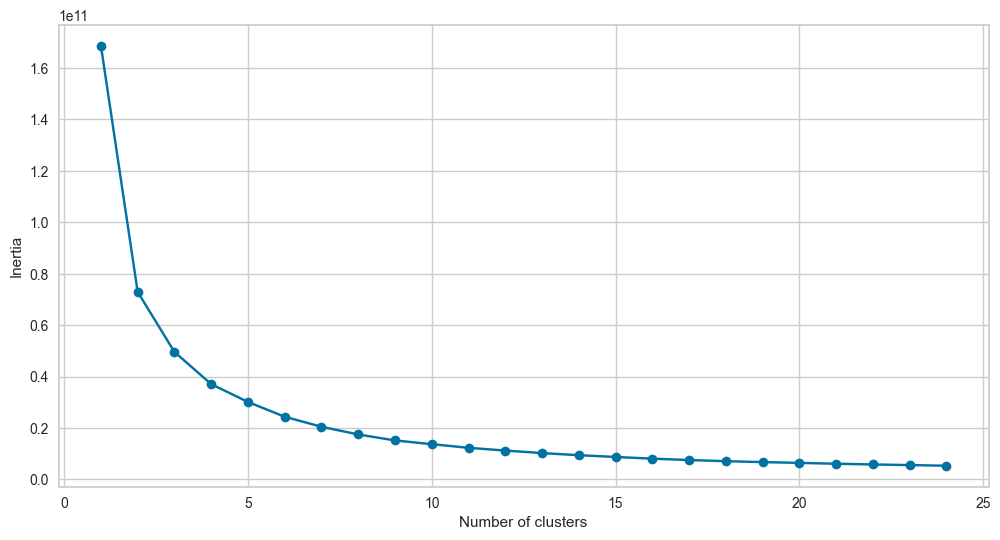

In [23]:
# Mencari nilai n_clustering yang optimal
score=[]
K = range(1, 25)

for i in K : 
    kmeans_model = KMeans(n_clusters=i, init="k-means++", random_state=1)
    kmeans_model.fit(df_pca)
    score.append(kmeans_model.inertia_)

# visualizaton
frame = pd.DataFrame({'Cluster':K, 'Score':score})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


Banyak cluster yang optimal adalah 4 karena penurunan nilai yang drastis yang membentuk siku terjadi pada titik n=4. Hal ini juga dapat dibuktikan dengan menggunakan yellowbrick visualisasi metode Elbow

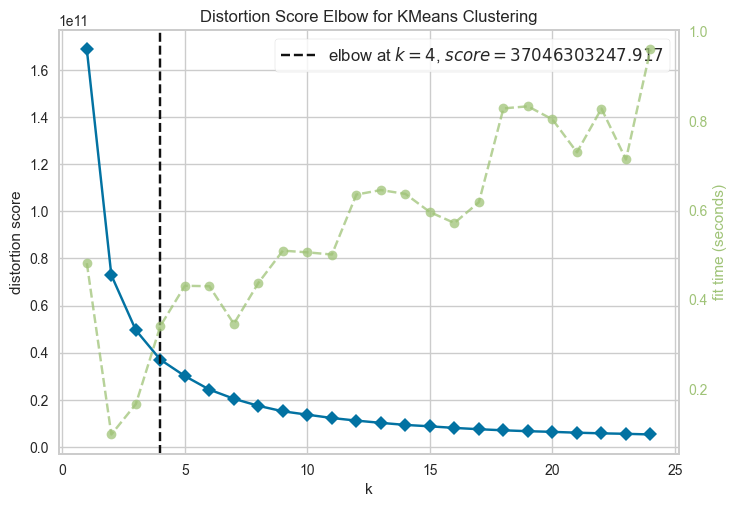

In [24]:
# Mencari nilai n_clustering yang optimal dengan menggunakan metode Elbow
kmeans_model = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans_model, k =(1,25))
elbow_visualizer.fit(df_pca)
elbow_visualizer.poof()
plt.show()


Dengan menggunakan metode Elbow diperoleh bahwa nilai n_cluster yang optimal adalah 4. Selain itu, penentuan n_cluster juga dapat menggunakan metode Silhouette Score dengan melihat nilai n yang memiliki nilai Silhouette Score mendekati 1 

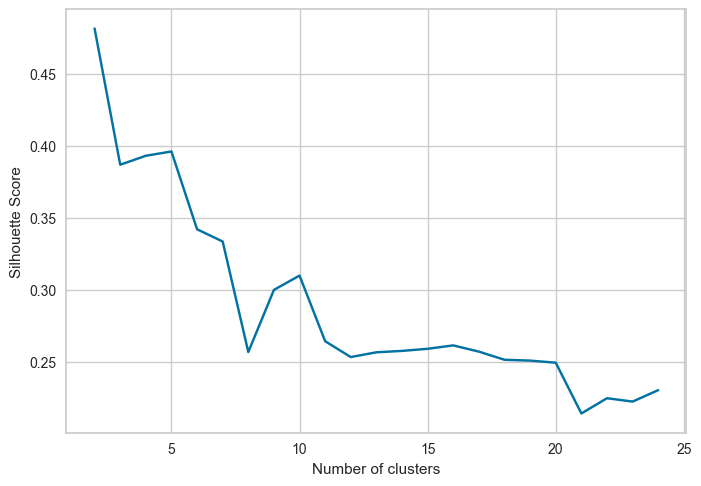

In [25]:
# Mencari nilai n_clustering yang optimal dengan menggunakan Silhouette Score
sil_coef = []
K = range(2, 25)

for i in K : 
    kmeans_model = KMeans(n_clusters=i, init="k-means++", random_state=1)
    kmeans_model.fit(df)
    score_sil = silhouette_score(df, kmeans_model.labels_)
    sil_coef.append(score_sil)

plt.plot(K, sil_coef)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

Berdasarkan plot Silhouette Score di atas dapat dilihat bahwa number of cluster yang memiliki nilai silhouette score tertinggi mendekati 1 adalah 5

#### Pendefinisian Model

In [26]:
# Modelisasi dengan n cluster = 4

# Initialize K-Means Model
kmeans_model = KMeans(n_clusters=4, init="k-means++")

#### Pelatihan Model

In [27]:
# Train the model
y_kmeans_model = kmeans_model.fit_predict(df_pca) 

#### Evaluasi Model

In [28]:
# Evaluasi Model 
print('Inertia  : ', kmeans_model.inertia_)
print('Silhouette Score : ', silhouette_score(df_pca, y_kmeans_model))
print('CH Score : ', calinski_harabasz_score(df_pca, y_kmeans_model))
print('DB Score : ', davies_bouldin_score(df_pca, y_kmeans_model))


Inertia  :  37046311050.558784
Silhouette Score :  0.519207044679539
CH Score :  10591.456722454403
DB Score :  0.8075809601625458


In [29]:
# Membuat dataframe duplikasi dari dataframe df 
df_kmeans = df.copy()

# Menambahkan kolom 'Cluster' yang menyimpan hasil prediksi
df_kmeans['Cluster'] = y_kmeans_model

# Menghitung banyaknya data untuk setiap Cluster
df_kmeans['Cluster'].value_counts()

3    5321
0    1830
1    1189
2     610
Name: Cluster, dtype: int64

Terlihat bahwa modelling tersebut mengelompokkan data menjadi 4 cluster dimana terdapat cluster berjumlah 5321, 1830, 1189, dan 610 

In [30]:
# Menampilkan dataframe
df_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,4455.284557,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


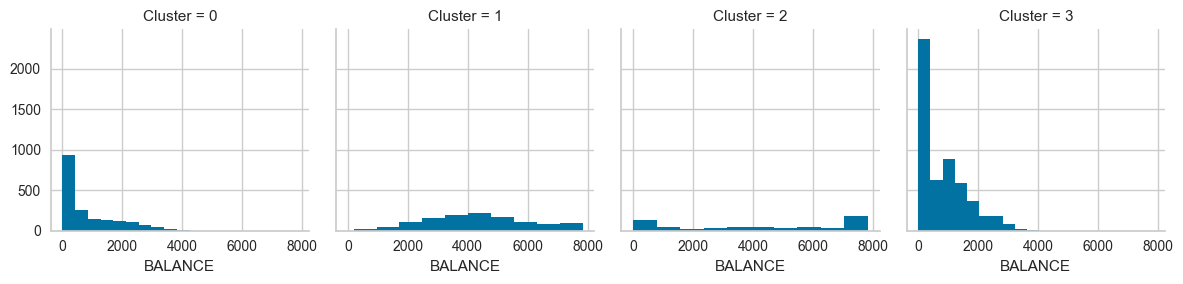

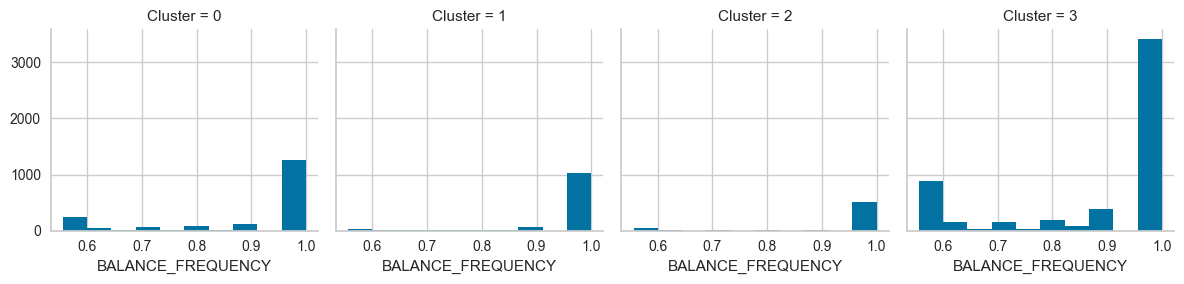

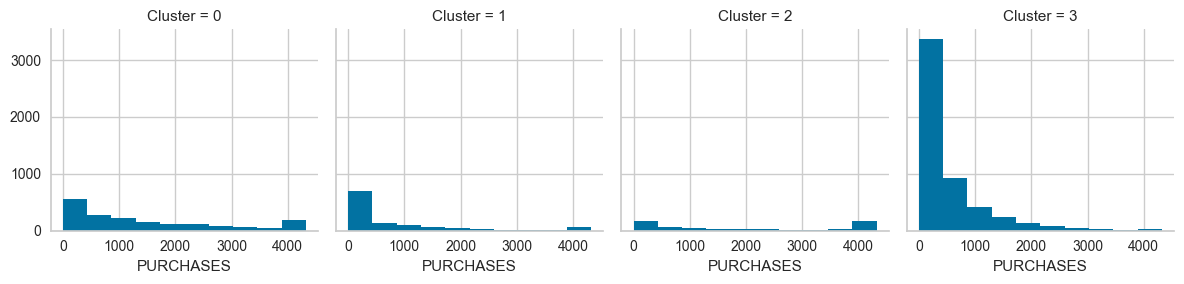

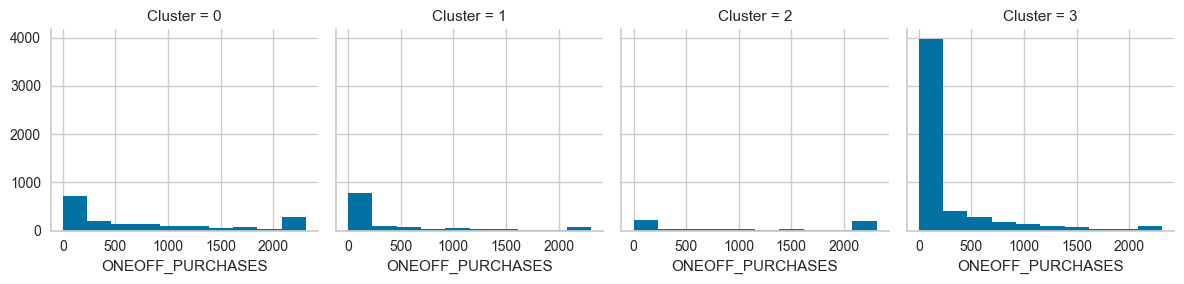

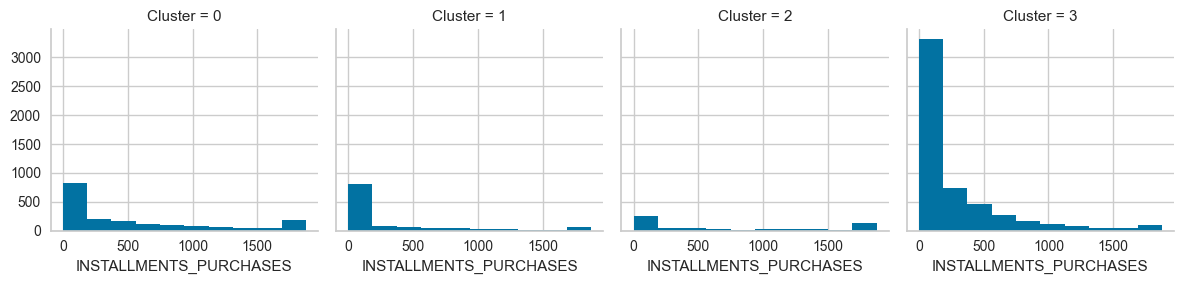

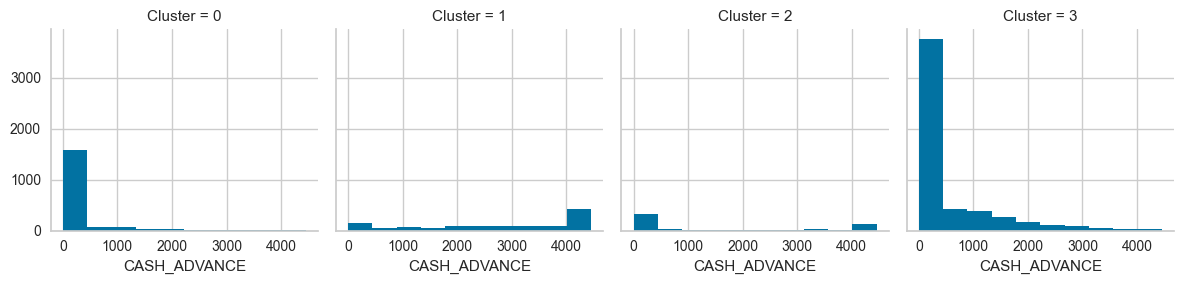

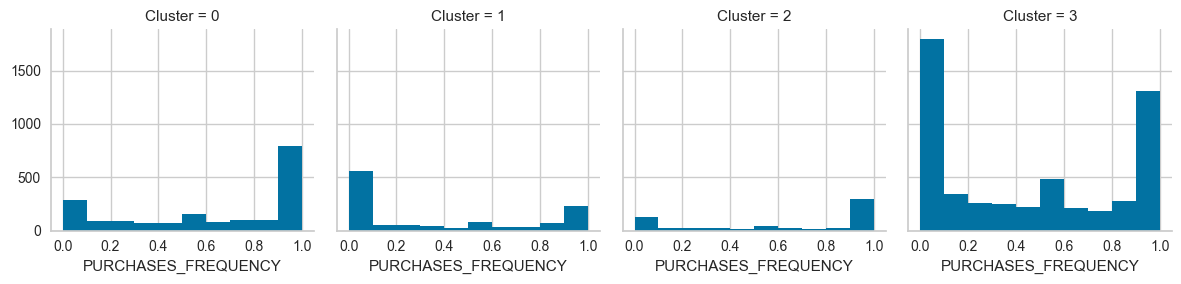

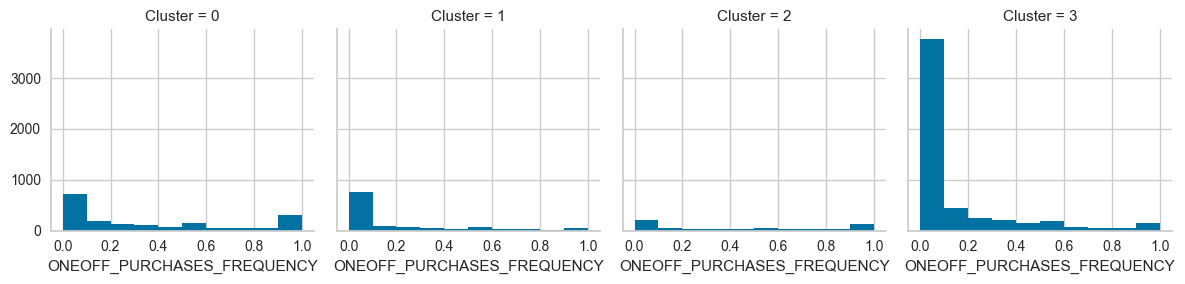

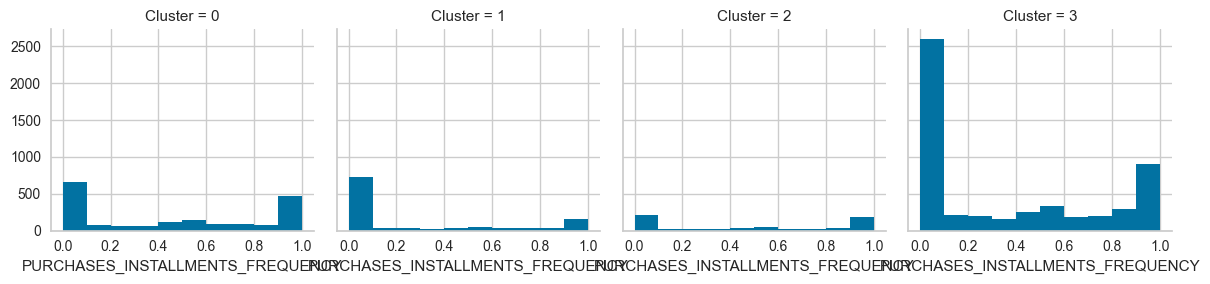

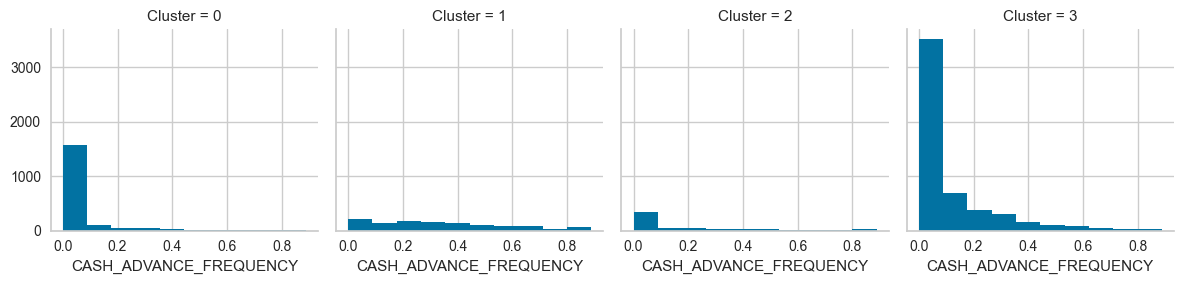

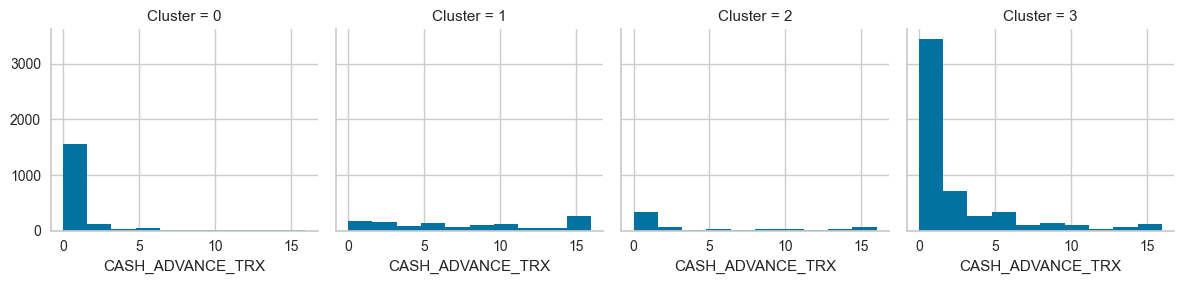

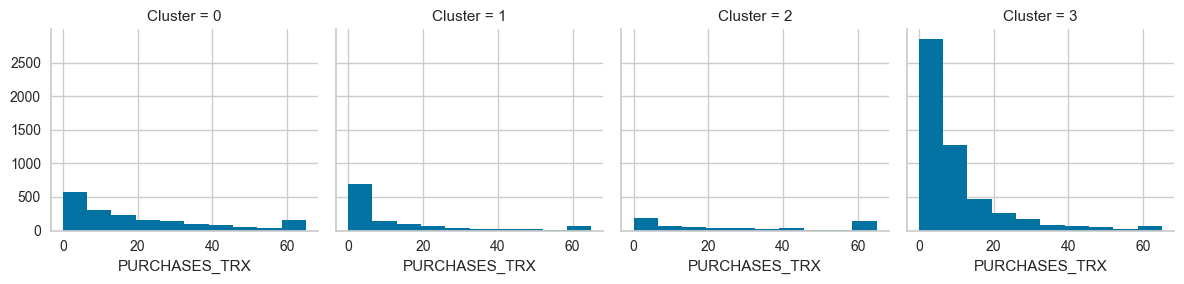

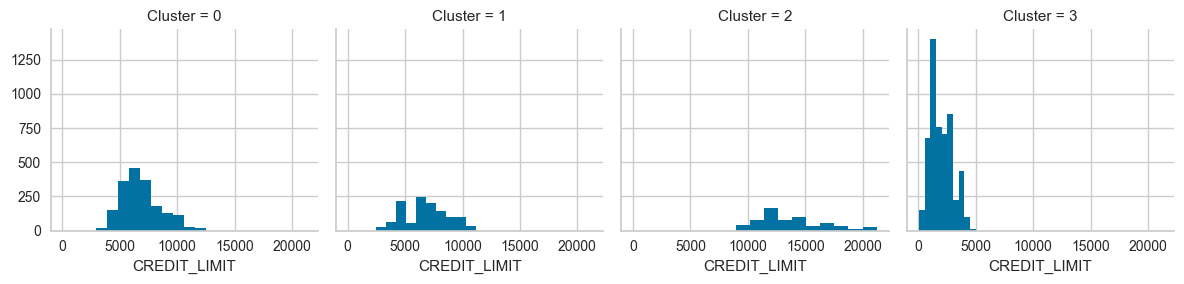

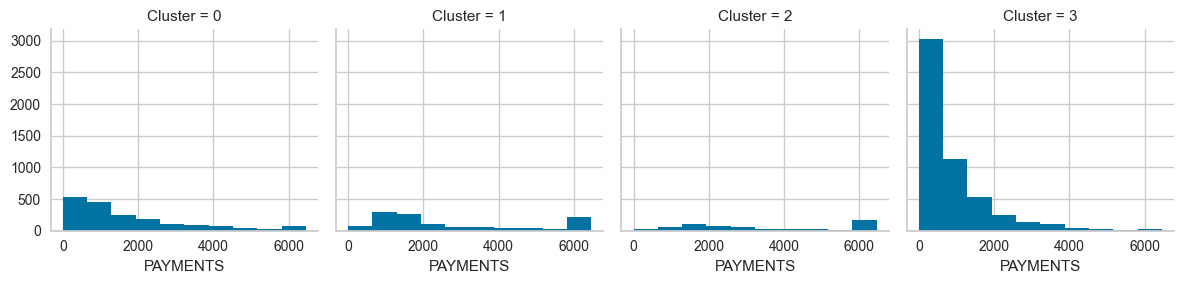

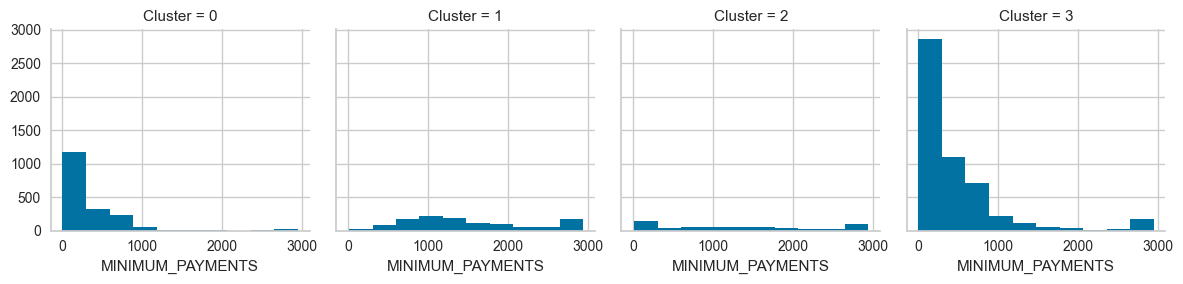

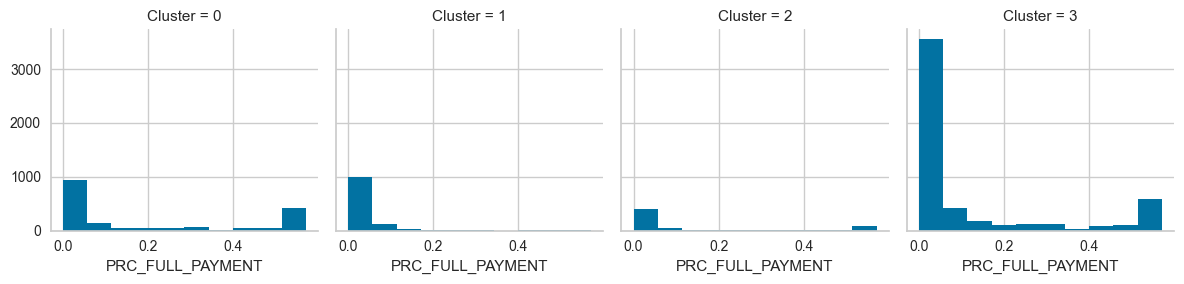

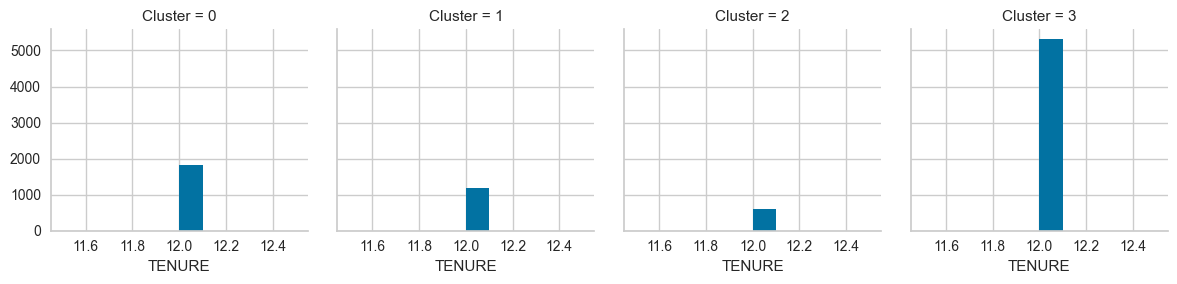

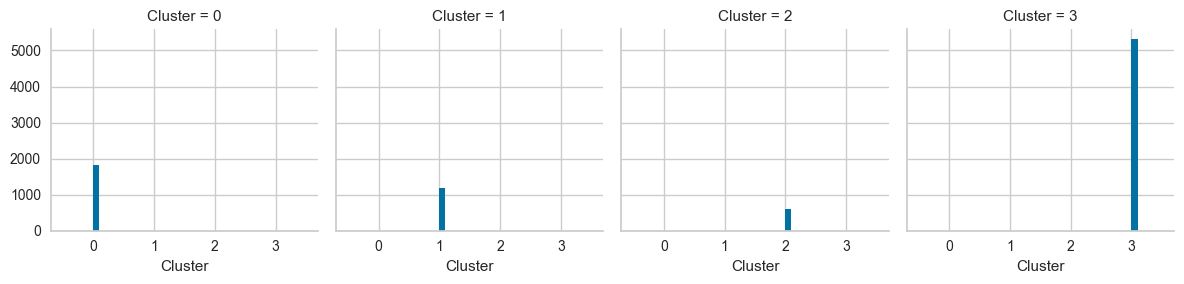

In [31]:
# Menampilkan visualisasi dari pengaruh nilai tiap atribut terhadap clusterisasi
for x in df_kmeans :
    grid = sns.FacetGrid(df_kmeans, col='Cluster')
    grid.map(plt.hist, x)

#### Interpretasi Cluster
- **Cluster 0 :** 
  - jumlah saldo tinggi paling banyak
  - frekuensi pembelian cukup rendah
  - kredit limit cukup kecil
  - suku bunga yang dibayarkan pengguna cukup rendah
  - tenor cukup singkat

- **Cluster 1 :**
  - jumlah saldo rendah paling banyak
  - frekuensi pembelian tinggi
  - kredit limit kecil
  - suku bunga yang dibayarkan pengguna tinggi
  - tenor lama

- **Cluster 2 :**
  - jumlah saldo rendah cukup banyak
  - frekuensi pembelian cukup tinggi
  - kredit limit cukup besar
  - suku bunga yang dibayarkan pengguna cukup tinggi
  - tenor cukup lama
  
- **Cluster 3 :**
  - jumlah saldo rendah dan tinggi seimbang dengan frekuensi paling sedikit
  - frekuensi pembelian rendah
  - kredit limit besar
  - suku bunga yang dibayarkan pengguna rendah
  - tenor singkat

In [32]:
# Menggabungkan dataframe
df_kmeans_pca1 = pd.concat([df_kmeans.reset_index(drop=True), df_pca], axis=1)

# Mengganti nama kolom pada dataframe
df_kmeans_pca1.columns.values[-2:] = ['Component 1', 'Component 2']

df_kmeans_pca1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Component 1,Component 2
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3,-4166.555087,387.189046
1,3202.467416,0.909091,0.00,0.00,0.00,4455.284557,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,3767.288198,-2862.692948
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2694.225497,962.881852
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,2470.362075,1667.634608
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3,-3636.803446,-216.001889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,12,3,-4119.185346,437.365964
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,12,3,-4067.652379,249.931977
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,12,3,-4197.332761,446.174931
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,12,3,-4674.721233,236.822188


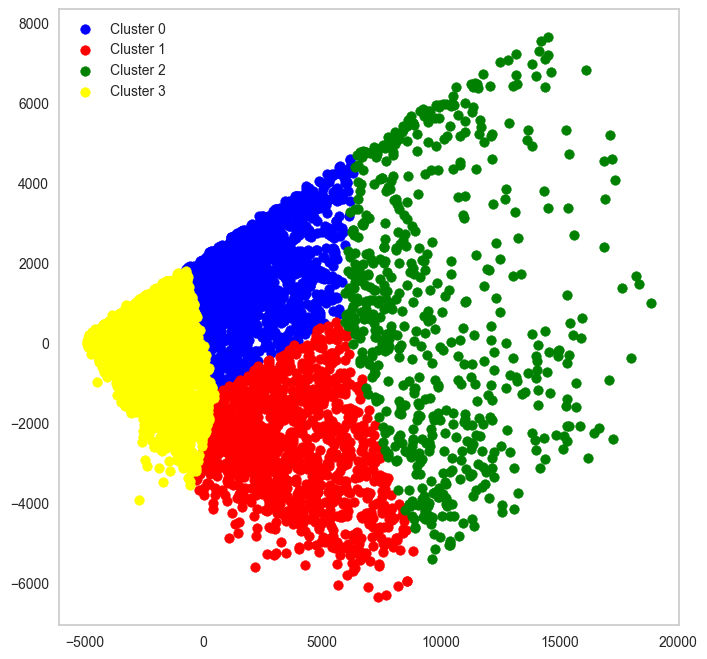

In [33]:
# Menampilkan visualisasi dari hasil clusterisasi atribut BALANCE dan CREDIT LIMIT
X = df_kmeans_pca1[['Component 1', 'Component 2']].to_numpy()
y_pred_kmeans = kmeans_model.predict(X)
plt.figure(figsize=(8,8))

plt.scatter(X[y_pred_kmeans == 0, 0], X[y_pred_kmeans == 0, 1],  c='blue', label='Cluster 0')
plt.scatter(X[y_pred_kmeans == 1, 0], X[y_pred_kmeans == 1, 1],  c='red', label='Cluster 1')
plt.scatter(X[y_pred_kmeans == 2, 0], X[y_pred_kmeans == 2, 1],  c='green', label='Cluster 2')
plt.scatter(X[y_pred_kmeans == 3, 0], X[y_pred_kmeans == 3, 1],  c='yellow', label='Cluster 3')

# plot centroid
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='*',s=100, c='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

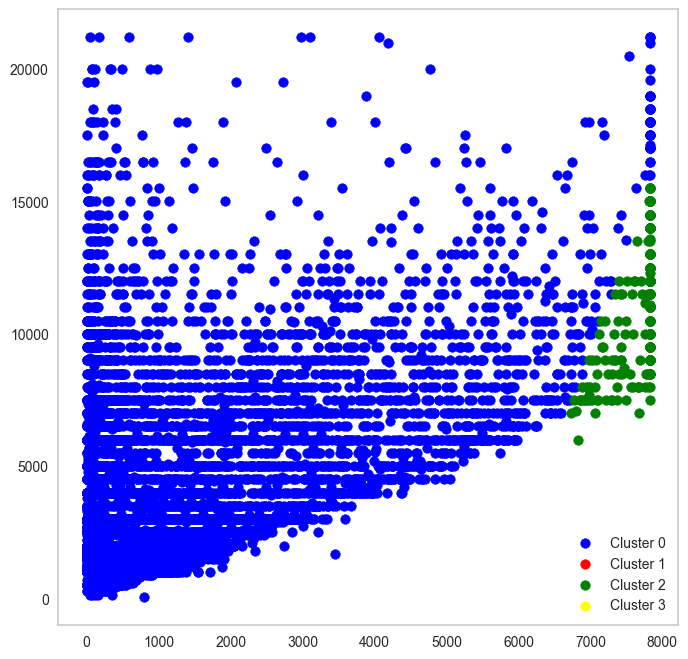

In [34]:
# Menampilkan visualisasi dari hasil clusterisasi atribut BALANCE dan CREDIT LIMIT
X = df_kmeans_pca1[['BALANCE', 'CREDIT_LIMIT']].to_numpy()
y_pred_kmeans = kmeans_model.predict(X)
plt.figure(figsize=(8,8))

plt.scatter(X[y_pred_kmeans == 0, 0], X[y_pred_kmeans == 0, 1],  c='blue', label='Cluster 0')
plt.scatter(X[y_pred_kmeans == 1, 0], X[y_pred_kmeans == 1, 1],  c='red', label='Cluster 1')
plt.scatter(X[y_pred_kmeans == 2, 0], X[y_pred_kmeans == 2, 1],  c='green', label='Cluster 2')
plt.scatter(X[y_pred_kmeans == 3, 0], X[y_pred_kmeans == 3, 1],  c='yellow', label='Cluster 3')

# plot centroid
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='*',s=100, c='black', label='Centroids')
plt.legend(scatterpoints=1, loc='lower right')
plt.grid()
plt.show()

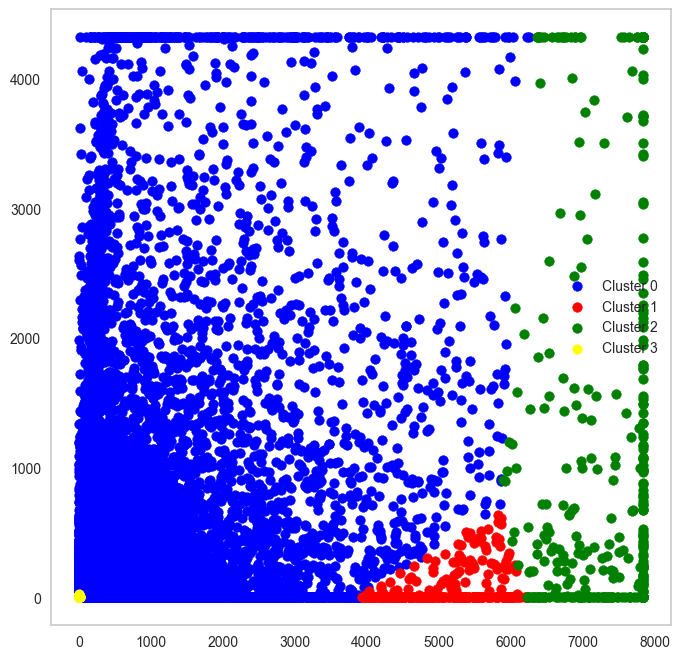

In [35]:
# Menampilkan visualisasi dari hasil clusterisasi atribut BALANCE dan PURCHASES
X = df_kmeans_pca1[['BALANCE', 'PURCHASES']].to_numpy()
y_pred_kmeans = kmeans_model.predict(X)
plt.figure(figsize=(8,8))

plt.scatter(X[y_pred_kmeans == 0, 0], X[y_pred_kmeans == 0, 1],  c='blue', label='Cluster 0')
plt.scatter(X[y_pred_kmeans == 1, 0], X[y_pred_kmeans == 1, 1],  c='red', label='Cluster 1')
plt.scatter(X[y_pred_kmeans == 2, 0], X[y_pred_kmeans == 2, 1],  c='green', label='Cluster 2')
plt.scatter(X[y_pred_kmeans == 3, 0], X[y_pred_kmeans == 3, 1],  c='yellow', label='Cluster 3')

# plot centroid
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='*',s=100, c='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Pada visualisasi diatas menjelaskan hubungan antara BALANCE dan PURCHASES. Cluster 0 hanya ada pada angka 0 dan sangat kecil. Cluster 3 menunjukkan angka BALANCE lebih dari 6000. Cluster 1 menunjukkan angka BALANCE diantara 4000 sampai kurang dari 7000, namun angka PURCHASES di bawah 1000. Cluster 2 menunjukkan angka BALANCE dari 0 sampai kurang dari 7000.

Dapat disimpulkan bahwa:
- Cluster 0: orang yang memiliki saldo sedikit dan jumlah pembelian yang sangat sedikit\
- Cluster 2: orang yang memiliki saldo dari 0 sampai dengan kurang dari 7000, namun pada angka 4000-6000 jumlah pembeliannya diatas 0. Dan seiring meningkatnya angka BALANCE, meningkat juga angka PURCHASES nya
- Cluster 1: orang yang memiliki saldo diantara 4000 sampai kurang dari 7000 namun pembeliannya hanya kurang dari 1000. Cluster 2 ini juga bagian sub dari cluster 1
- Cluster 3: orang yang memiliki saldo lebih dari 6000 dan banyak yang melakukan pembelian

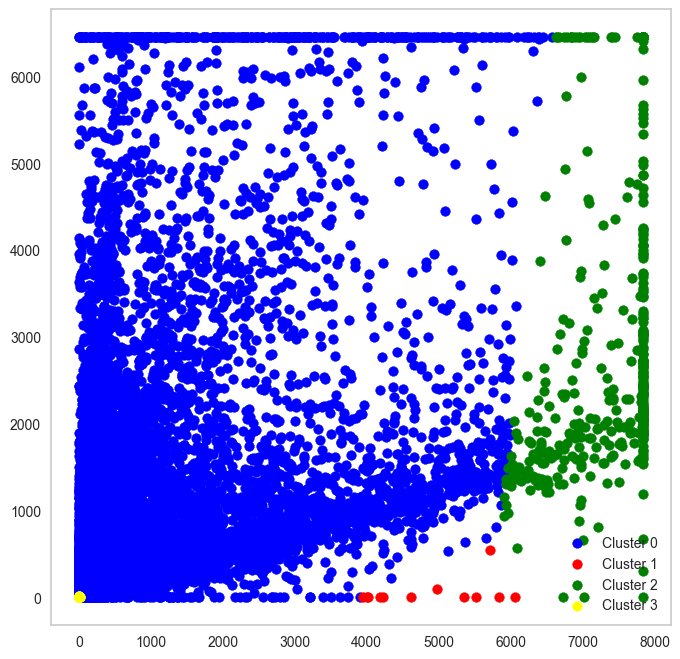

In [36]:
# Menampilkan visualisasi dari hasil clusterisasi atribut BALANCE dan Payment
X = df_kmeans_pca1[['BALANCE', 'PAYMENTS']].to_numpy()
y_pred_kmeans = kmeans_model.predict(X)
plt.figure(figsize=(8,8))

plt.scatter(X[y_pred_kmeans == 0, 0], X[y_pred_kmeans == 0, 1],  c='blue', label='Cluster 0')
plt.scatter(X[y_pred_kmeans == 1, 0], X[y_pred_kmeans == 1, 1],  c='red', label='Cluster 1')
plt.scatter(X[y_pred_kmeans == 2, 0], X[y_pred_kmeans == 2, 1],  c='green', label='Cluster 2')
plt.scatter(X[y_pred_kmeans == 3, 0], X[y_pred_kmeans == 3, 1],  c='yellow', label='Cluster 3')

# plot centroid
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='*',s=100, c='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

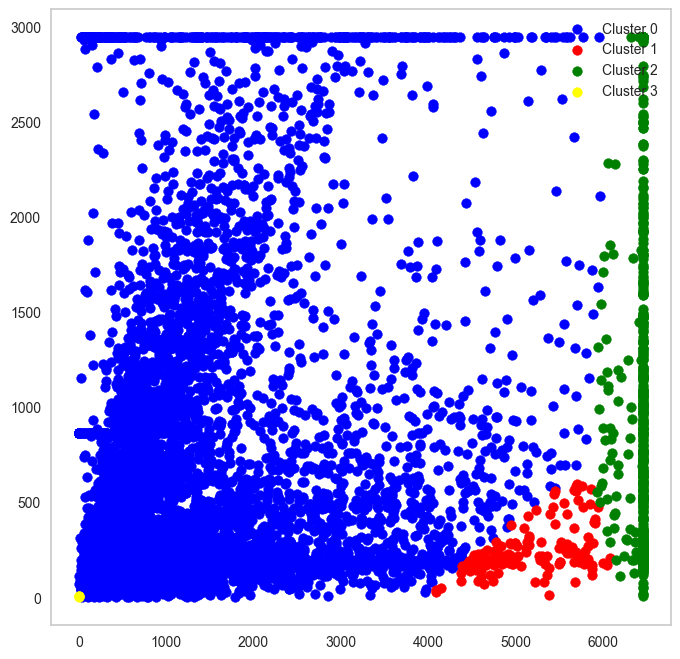

In [37]:
# Menampilkan visualisasi dari hasil clusterisasi atribut BALANCE dan CREDIT LIMIT
X = df_kmeans_pca1[['PAYMENTS', 'MINIMUM_PAYMENTS']].to_numpy()
y_pred_kmeans = kmeans_model.predict(X)
plt.figure(figsize=(8,8))

plt.scatter(X[y_pred_kmeans == 0, 0], X[y_pred_kmeans == 0, 1],  color='blue', label='Cluster 0')
plt.scatter(X[y_pred_kmeans == 1, 0], X[y_pred_kmeans == 1, 1],  color='red', label='Cluster 1')
plt.scatter(X[y_pred_kmeans == 2, 0], X[y_pred_kmeans == 2, 1],  color='green', label='Cluster 2')
plt.scatter(X[y_pred_kmeans == 3, 0], X[y_pred_kmeans == 3, 1],  color='yellow', label='Cluster 3')

# plot centroid
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='*',s=100, c='black', label='Centroids')
plt.legend(scatterpoints=1, loc='upper right')
plt.grid()
plt.show()

Di atas merupakan visualisasi scatterplot yang mana nilai X = 'PAYMENTS' dan Y = 'MINIMUM_PAYMENTS'. Payments adalah jumlah pembayaran yang dilakukan oleh pengguna. Sedangkan Minimum Payments adalah jumlah minimum pembayaran yang dilakukan oleh pengguna. Cluster 0 terletak di angka sekitar 0 dan sangat kecil. Cluster 2 terletak di angka PAYMENT 0 sampai 6000, namun pada angka 4000 sampai 6000, nilai MINIMUM PAYMENT nya lebih dari 0. Cluster 1 berada pada angka PAYMENT 4000 sampai 6000 dan angka MINIMUM PAYMENT dibawah 500. Cluster 3 berada pada angka PAYMENT diatas 6000

Dapat disimpulkan bahwa:
- Cluster 0: sangat jarang melakukan pembayaran
- Cluster 2: terdapat beberapa yang minimum payment nya diatas 0 bahkan diatas 500
- Cluster 1: melakukan payment direntang 4000 sampai dengan 6000 namun minimum paymenntnya dibawah 500
- Cluster 3: melakukan payment yang angkanya diatas 6000

#### - K-Means Algorithm dengan PCA (Dengan Scaling Data)

In [38]:
# Normalisasi data dengan Standard Scaler
scaler = StandardScaler()
data_scaled = df.copy()
data_scaled= scaler.fit_transform(data_scaled)

In [39]:
# Informasi statistik mengenai scaled data (data_scaled)
df_data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
df_data_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,-9.212990e-17,6.820913e-15,4.878273e-15,-9.025803e-15,-4.819484e-16,-5.842242e-15,-3.716084e-16,2.021052e-15,2.353921e-16,9.785344e-16,-9.154006e-16,1.912461e-15,3.934184e-15,-4.995383e-16,1.096987e-15,-5.730413e-15,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-8.063038e-01,-2.177029e+00,-7.331783e-01,-6.213795e-01,-6.645862e-01,-6.109637e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.818512e-01,-6.273136e-01,-7.780126e-01,-1.227634e+00,-9.048022e-01,-8.866749e-01,-5.820061e-01,0.0
25%,-7.381587e-01,-1.107512e-01,-6.985352e-01,-6.213795e-01,-6.645862e-01,-6.109637e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.818512e-01,-6.273136e-01,-7.183670e-01,-7.991253e-01,-6.726894e-01,-6.563832e-01,-5.820061e-01,0.0
50%,-3.423493e-01,5.780081e-01,-4.174001e-01,-5.661675e-01,-4.917618e-01,-6.109637e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.818512e-01,-6.273136e-01,-3.604930e-01,-4.120854e-01,-3.858610e-01,-4.342709e-01,-5.820061e-01,0.0
75%,2.848843e-01,5.780081e-01,2.371352e-01,2.175605e-01,2.454360e-01,2.321011e-01,1.062211e+00,3.269728e-01,9.701506e-01,4.449674e-01,2.758041e-01,2.359636e-01,5.555142e-01,2.465284e-01,2.782571e-01,1.247498e-01,0.0
max,3.354013e+00,5.780081e-01,3.044146e+00,2.734381e+00,2.975503e+00,2.761295e+00,1.269843e+00,2.673451e+00,1.599199e+00,3.825423e+00,2.985157e+00,3.098955e+00,4.619433e+00,3.004182e+00,3.082178e+00,2.245018e+00,0.0


In [40]:
# PCA model menggunakan n_component = 2
pca_model = PCA(n_components=2)

# Fit model dengan data_scaled
pca_model_SS = pca_model.fit(data_scaled)

# Menghitung hasil component scores untuk elemen dalam dataset
pca_scores = pca_model_SS.transform(data_scaled)
pca_scores

# Membuat dataframe dari component PCA
pc = ['PC' + str(n) for n in range(1,3)]
df_pca_SS = pd.DataFrame(pca_scores, columns = pc)
df_pca_SS.head()

,PC1,PC2
0,-1.786193,-1.888075
1,-1.932685,2.459876
2,1.146107,-0.071857
3,-0.705455,-0.273396
4,-1.761149,-1.321093


#### Mencari nilai n_clustering yang optimal

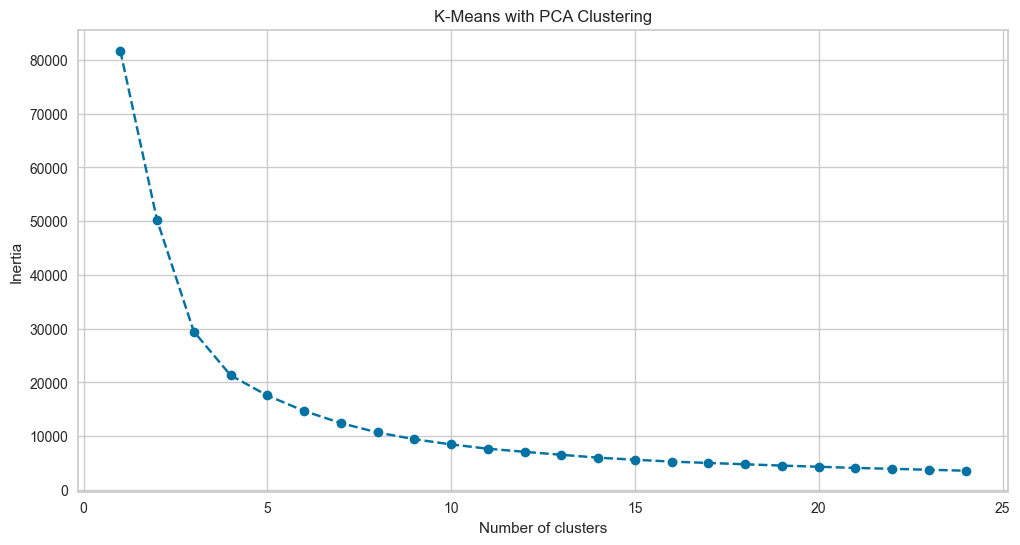

In [41]:
# Mencari nilai n_clustering yang optimal
score=[]
K = range(1, 25)

for i in K : 
    kmeans_model_SS = KMeans(n_clusters=i, init="k-means++", random_state=1)
    kmeans_model_SS.fit(df_pca_SS)
    score.append(kmeans_model_SS.inertia_)

# visualizaton
frame = pd.DataFrame({'Cluster':K, 'Score':score})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Score'], marker='o', linestyle='--')
plt.title('K-Means with PCA Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

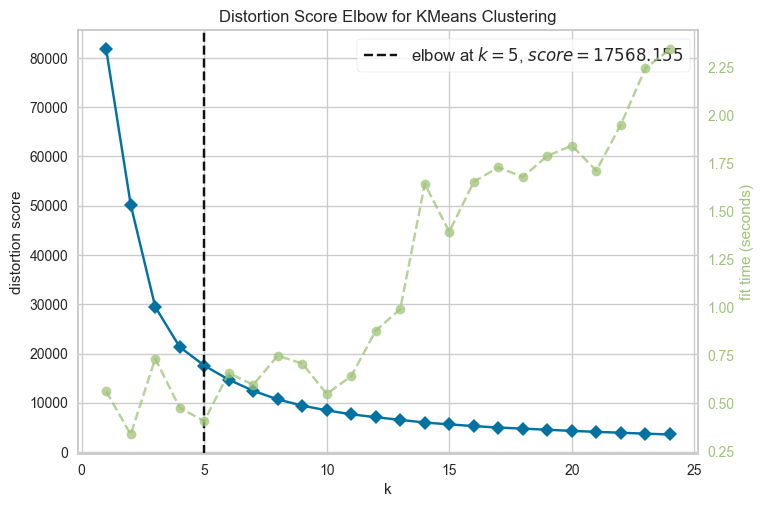

In [42]:
# Mencari nilai n_clustering yang optimal dengan metode Elbow
kmeans_model_SS = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans_model_SS, k =(1,25))
elbow_visualizer.fit(df_pca_SS)
elbow_visualizer.poof()
plt.show()


Dengan menggunakan metode Elbow diperoleh bahwa nilai n_cluster yang optimal adalah 5.

In [43]:
# Mencari nilai n_clustering yang optimal dengan Silhouette Score
sil_coef = []
K = range(2, 25)

for i in K : 
    kmeans_model_SS = KMeans(n_clusters=i, init="k-means++", random_state=1)
    kmeans_model_SS.fit(df_pca_SS)
    score_sil = silhouette_score(data_scaled, kmeans_model_SS.labels_)
    sil_coef.append(score_sil)

plt.plot(K, sil_coef)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

#### Pendefinisian Model

In [ ]:
# Modelisasi K-Means dengan n cluster = 5
kmeans_model_SS = KMeans(n_clusters=5, init='k-means++', random_state=1)

#### Pelatihan Model

In [ ]:
y_pca_kmeans = kmeans_model_SS.fit_predict(df_pca_SS)

#### Evaluasi Model

In [ ]:
# Evaluasi Model 
print('Inertia : ', kmeans_model_SS.inertia_)
print('Silhouette Score : ', silhouette_score(df_pca_SS, y_pca_kmeans))
print('CH Score : ', calinski_harabasz_score(df_pca_SS, y_pca_kmeans))
print('DB Score : ', davies_bouldin_score(df_pca_SS, y_pca_kmeans))

Inertia :  17567.343521500272
Silhouette Score :  0.37112435496583807
CH Score :  8166.726108484036
DB Score :  0.8224636261943619


- Nilai inertia dari pemodelan dengan menggunakan data yang telah di scaling memiiki nilai yang jauh lebih baik karena nilai inertianya lebih rendah (mendekati 0)
- Nilai Silhouette Score menjadi lebih tinggi daripada sebelumnya (mendekati 1) yang berarti bahwa model kluuster lebih jelas dan lebih baik (tidak setumpang tindih yang mendekati 0)
- Nilai Davies-Bouldin Score juga semakin rendah yang berati bahwa nilai partisi lebih baik. 
- Nilai Calinski-Harabasz Score semakin tinggi yang berarti bahwa kluster dalam model yang lebih jelas dan lebih baik

- Hasil evaluasi tanpa scaling :

    -  Inertia  :  37046311050.55879
    - Silhouette Score :  0.519207044679539
    - CH Score :  10591.456722454397
    - DB Score :  0.8075809601625459

- Hasil evaluasi dengan scaling:

    - Inertia :  17567.343540813807
    - Silhouette Score :  0.3711243541091633
    - CH Score :  8166.726097047796
    - DB Score :  0.8224636275698609

In [ ]:
# Menambahkan kolom/atribut Cluster pada dataframe
df_data_scaled['Cluster'] = y_pca_kmeans
df_pca_SS['Cluster'] = y_pca_kmeans

In [ ]:
# menghitung banyaknya data untuk setiap cluster
df_pca_SS['Cluster'].value_counts()

0    2683
2    2510
3    1831
1    1060
4     866
Name: Cluster, dtype: int64

In [ ]:
# Menggabungkan dataframe
df_kmeans_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)

# Mengganti nama kolom pada dataframe
df_kmeans_pca.columns.values[-2:] = ['Component 1', 'Component 2']

# Menambahkan atribut pada dataframe
df_kmeans_pca['K-Means with PCA'] = kmeans_model_SS.labels_

In [ ]:
df_kmeans_pca.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Component 1,Component 2,K-Means with PCA
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-1.786193,-1.888075,0
1,3202.467416,0.909091,0.00,0.00,0.0,4455.284557,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.932685,2.459876,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.146107,-0.071857,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.705455,-0.273396,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-1.761149,-1.321093,0


In [ ]:
# Menampilkan nilai rata-rata untuk setiap atribut pada masing-masing cluster
df_kmeans_pca_freq = df_kmeans_pca.groupby(['K-Means with PCA']).mean()
df_kmeans_pca_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Component 1,Component 2
K-Means with PCA,,,,,,,,,,,,,,,,,,,
0,473.795844,0.795644,238.672292,142.027984,97.133116,170.353396,0.276467,0.073683,0.190659,0.043820,0.651510,3.892285,2844.408417,590.662195,315.830613,0.097283,12.0,-1.252977,-1.412952
1,2407.005284,0.985351,3331.859047,1688.730198,1155.605708,526.168660,0.950658,0.662882,0.769881,0.081523,1.770755,46.922642,7833.962264,3595.128066,921.721562,0.190851,12.0,4.579273,1.134892
2,715.380525,0.943186,1037.356723,476.482833,530.053450,117.348808,0.845569,0.267818,0.648922,0.027786,0.472112,18.241833,3982.451628,1151.305779,444.678382,0.203902,12.0,1.183909,-1.081024
3,1956.977401,0.938273,144.950546,101.021382,43.845396,1574.383660,0.126958,0.057215,0.069277,0.277444,5.654287,2.128345,3852.384853,1337.518741,809.359288,0.030496,12.0,-1.907003,0.908671
4,5061.565748,0.982563,538.320785,318.209792,192.635266,3501.401661,0.328339,0.155501,0.206075,0.487037,11.205543,7.942263,8320.559521,3045.530615,1691.343975,0.025340,12.0,-1.122611,4.200415


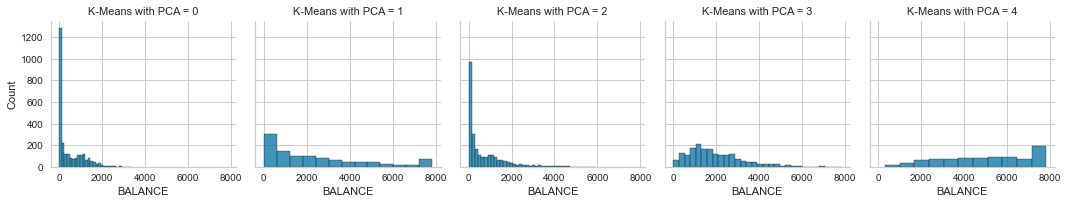

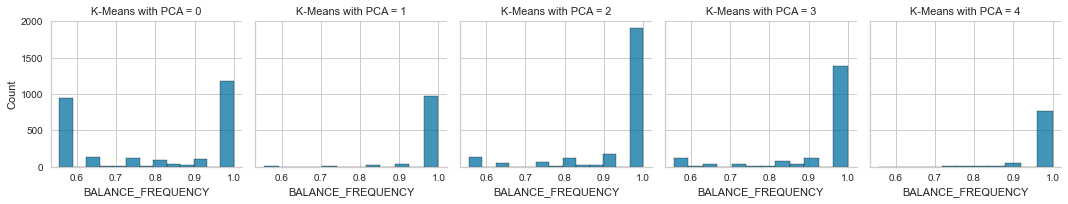

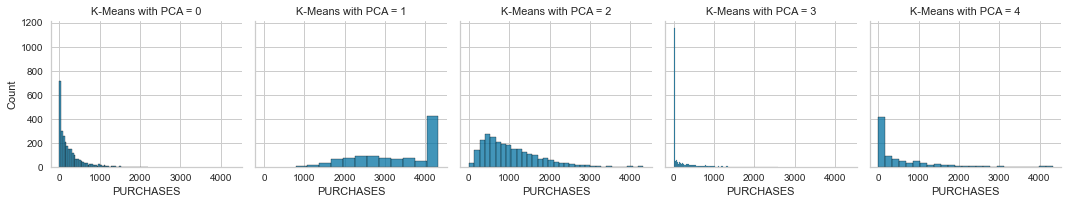

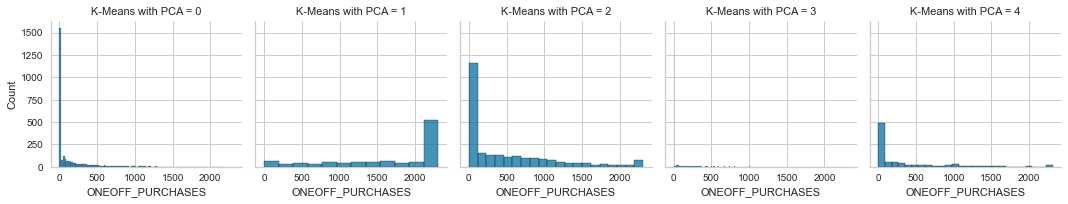

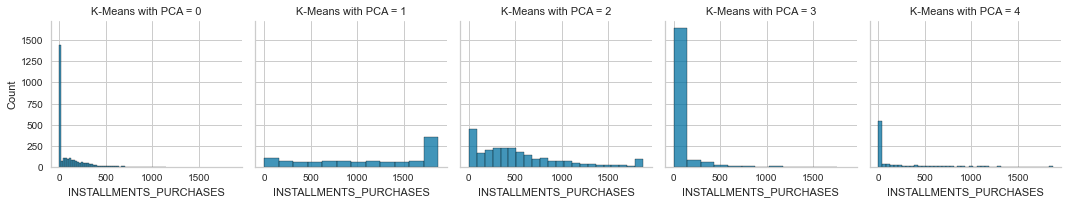

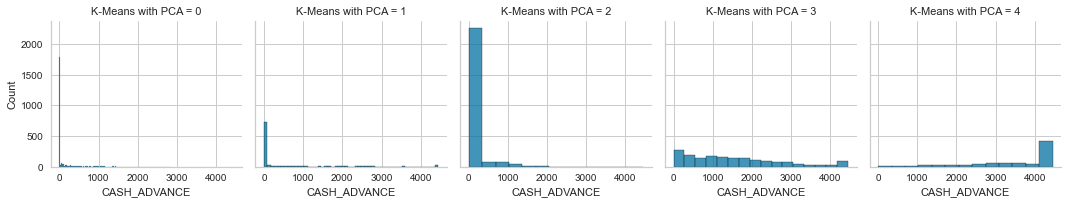

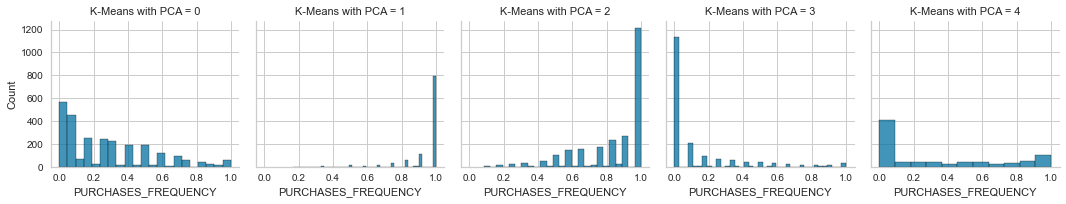

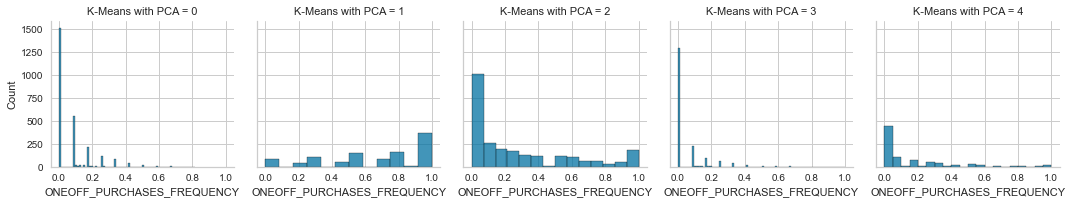

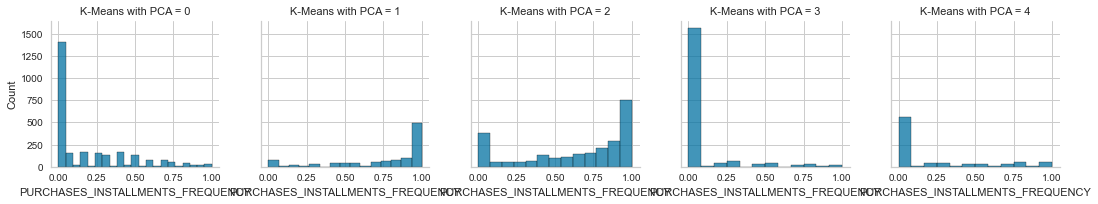

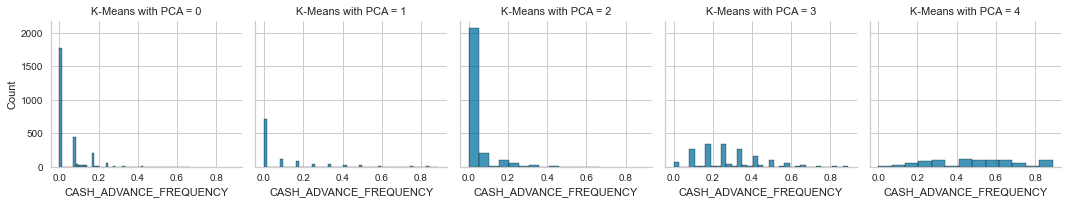

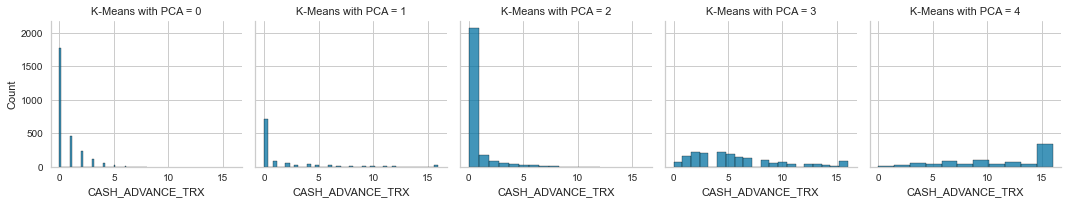

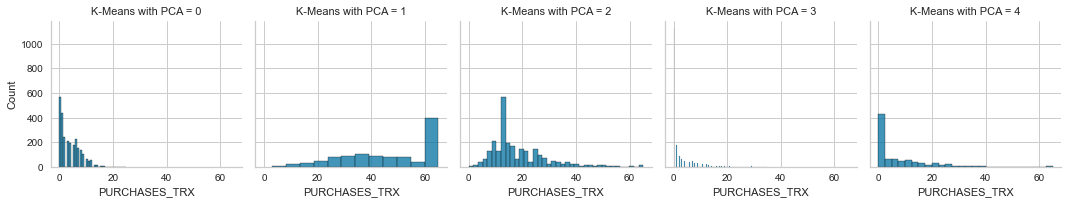

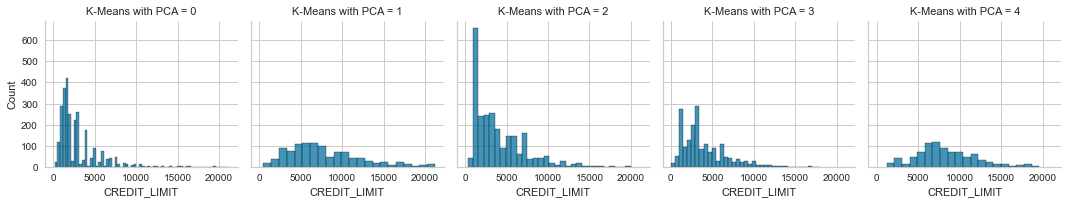

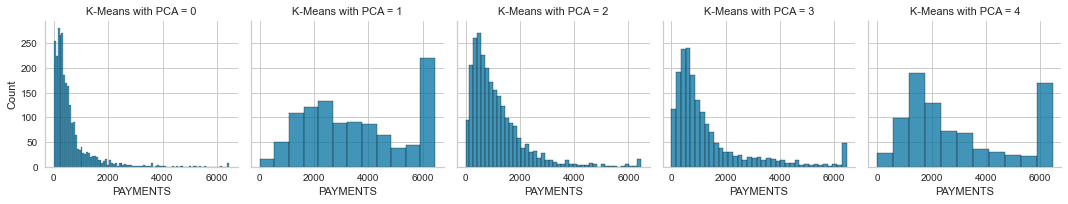

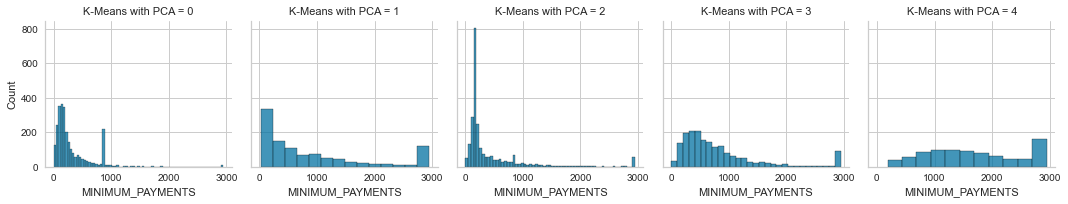

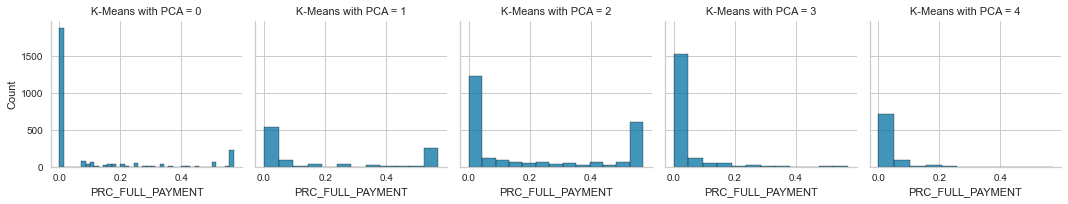

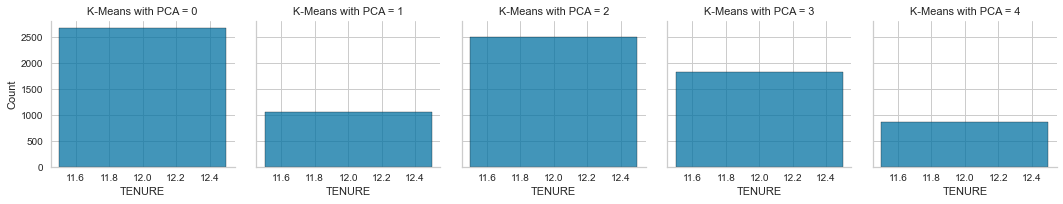

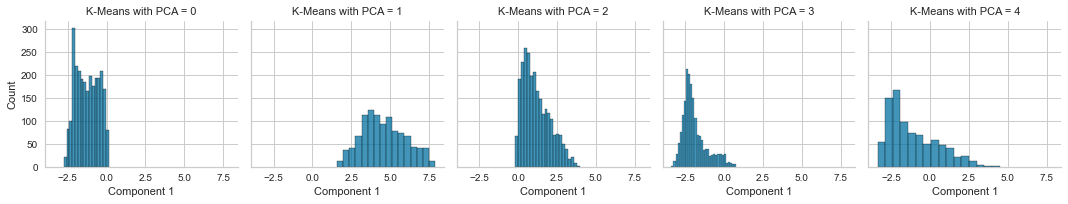

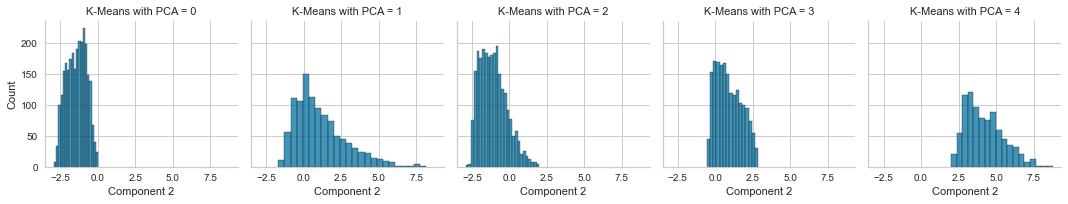

In [ ]:
# Menampilkan visualisasi dari pengaruh nilai tiap atribut terhadap clusterisasi
for x in df_kmeans_pca.drop('K-Means with PCA', axis=1).columns :
    grid = sns.FacetGrid(df_kmeans_pca, col='K-Means with PCA')
    grid.map(sns.histplot, x)

In [ ]:
# Memberikan label untuk tiap clustering
df_kmeans_pca['Cluster'] = df_kmeans_pca['K-Means with PCA'].map({0:'Type A', 1:'Type B', 2:'Type C', 3:'Type D', 4:'Type E'})
df_kmeans_pca

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Component 1,Component 2,K-Means with PCA,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,-1.786193,-1.888075,0,Type A
1,3202.467416,0.909091,0.00,0.00,0.00,4455.284557,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.932685,2.459876,3,Type D
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,1.146107,-0.071857,2,Type C
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,864.206542,0.000000,12,-0.705455,-0.273396,0,Type A
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,-1.761149,-1.321093,0,Type A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,325.594462,48.886365,0.500000,12,0.341901,-2.395818,2,Type C
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,275.861322,864.206542,0.000000,12,-0.010479,-1.599607,0,Type A
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,5,1000.0,81.270775,82.418369,0.250000,12,-0.429904,-2.356654,0,Type A
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0,500.0,52.549959,55.755628,0.250000,12,-2.180951,-1.653163,0,Type A


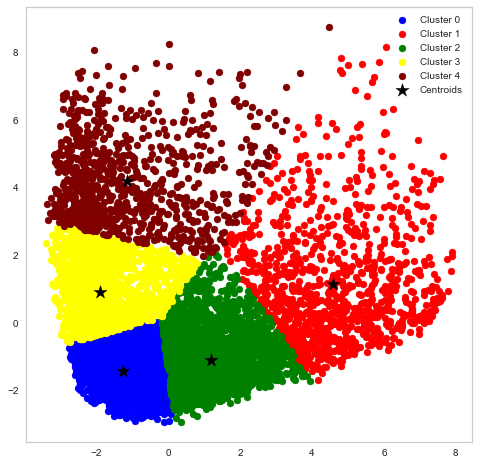

In [ ]:
X = df_kmeans_pca[['Component 1', 'Component 2']].to_numpy()
y_pred_kmeans_pca = kmeans_model_SS.predict(X)
plt.figure(figsize=(8,8))

plt.scatter(X[y_pred_kmeans_pca  == 0, 0], X[y_pred_kmeans_pca  == 0, 1],  c='blue', label='Cluster 0')
plt.scatter(X[y_pred_kmeans_pca  == 1, 0], X[y_pred_kmeans_pca  == 1, 1],  c='red', label='Cluster 1')
plt.scatter(X[y_pred_kmeans_pca  == 2, 0], X[y_pred_kmeans_pca  == 2, 1],  c='green', label='Cluster 2')
plt.scatter(X[y_pred_kmeans_pca  == 3, 0], X[y_pred_kmeans_pca  == 3, 1],  c='yellow', label='Cluster 3')
plt.scatter(X[y_pred_kmeans_pca  == 4, 0], X[y_pred_kmeans_pca  == 4, 1],  c='maroon', label='Cluster 4')


# plot centroid
plt.scatter(kmeans_model_SS.cluster_centers_[:, 0], kmeans_model_SS.cluster_centers_[:, 1], marker='*',s=200, c='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### Save Pickle

In [ ]:
#simpan model kedalam file dengan pickle
import pickle
pickle.dump(pca_model1, open('pca_model.pkl', 'wb')) #pca model
pickle.dump(kmeans_model, open('kmeans_model.pkl', 'wb')) #kmeans model no scalling

## h. Kesimpulan
1. Sebelum melakukan clustering, dataset ini kami telusuri atau eksplor terlebih dahulu, ada beberapa tahapan yang pertama seperti apa saja isi data nya, feature dan target. Kemudian melakukan data cleaning, cek dan menangani missing value, dan cek duplikasi data. 

2. Lalu masuk ke tahapan eksplorasi data, yaitu melihat deskripsi data, cek distribusi tiap atribut, dan korelasi atribut. Semua atribut distribusi tidak normal karena mengalami skewness. Dari matrix korelasi yang dihasilkan, terlihat atribut yang memiliki korelasi tinggi yaitu:
- PURCHASES dan ONEOFF_PURCHASES sebesar 0.92
- PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY sebesar 0.86
- CAHS_ADVANCED_FREQUENCY dan CASH_ADVANCED_TRX sebesar 0.8

3. Kemudian melakukan data preprocessing dengan mengecek outlier

4. Setelah itu, masuk ketahapan modelling dengan menggunakan K-Means algorithm. Pada tahapan modelling ini kami melihat perbandingan bagaimana data tanpa scalling dan bagaimana data dengan scalling.

5. K-Means algorithm tanpa scalling, kami mendapatkan hasil dari evaluasi model yaitu:
- Inertia  :  37046311050.55879
- Silhouette Score :  0.519207044679539
- CH Score :  10591.456722454397
- DB Score :  0.8075809601625459

6. Dengan data scalling, kami mendapatkan hasil dari evaluasi model yaitu:
- Inertia :  17567.343540813807
- Silhouette Score :  0.3711243541091633
- CH Score :  8166.726097047796
- DB Score :  0.8224636275698609

7. Berdasarkan dari evaluasi model, nilai Silhouette Score yang terbaik adalah ketika menggunakan K-Means algortima tanpa scalling. Maka yang akan menjadi model untuk deployment K-Means tanpa Scalling